In [1]:
import pandas as pd
import numpy as np

In [2]:
from fastai.imports import *

from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [3]:
df_train = pd.read_csv('apr-train-sub-cat-1.csv',low_memory=False)

In [4]:
df_train.head()

,x_ray_image_file_name,sub_category
0,1.jpg,computer components and accessories
1,2.jpg,mobiles
2,4.jpg,books
3,5.jpg,books
4,6.jpg,books


In [5]:
df_test = pd.read_csv('apr-test-sub-cat-1.csv',low_memory=False)

In [6]:
df_test.head()

,x_ray_image_file_name,predictions
0,200001.jpg,home decor and furnishing
1,200002.jpg,jewellery
2,200003.jpg,books
3,200004.jpg,mobiles
4,200005.jpg,tablets


In [7]:
sz = 220
arch = dn201
bs = 64
path='data/delhivery'

In [8]:
trn_tfms,val_tfms = tfms_from_model(arch,sz,aug_tfms=[RandomFlip()],crop_type=CropType.NO)

In [9]:
data = ImageClassifierData.from_csv(path='data/delhivery/',folder='train',csv_fname='apr-train-sub-cat-1.csv',tfms=(trn_tfms,val_tfms),bs=bs,num_workers=4)

In [10]:
def show_img(im, figsize=None, ax=None):
    if not ax: fig,ax = plt.subplots(figsize=figsize)
    ax.imshow(im)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    return ax
x,y=next(iter(data.val_dl))

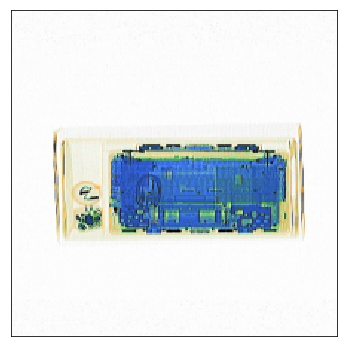

In [11]:
show_img(data.val_ds.denorm(to_np(x))[0],figsize=(6,6))

In [12]:
learn = ConvLearner.pretrained(arch,data,precompute=True,ps=0.2)

In [13]:
len(data.classes)

70

HBox(children=(IntProgress(value=0, description='Epoch', max=1), HTML(value='')))

 84%|████████▍ | 1361/1621 [00:21<00:04, 63.90it/s, loss=4.82]

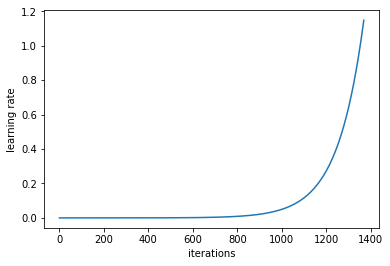

In [14]:
lrf=learn.lr_find()
learn.sched.plot_lr()

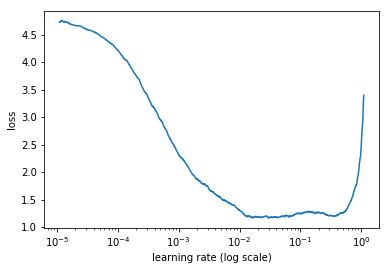

In [15]:
learn.sched.plot()

In [16]:
learn.fit(0.001,5)

HBox(children=(IntProgress(value=0, description='Epoch', max=5), HTML(value='')))

 29%|██▉       | 476/1621 [00:07<00:18, 60.83it/s, loss=1.41]

Exception in thread Thread-5:
Traceback (most recent call last):
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/threading.py", line 916, in _bootstrap_inner
    self.run()
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/tqdm/_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "/home/paperspace/anaconda3/envs/fastai/lib/python3.6/_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration



epoch      trn_loss   val_loss   accuracy                     
    0      1.072548   0.987336   0.756607  
    1      0.934071   0.879078   0.772309                      
    2      0.878117   0.82123    0.78181                       
    3      0.825445   0.785029   0.79286                       
    4      0.795588   0.755128   0.799214                      



[0.75512844, 0.7992140462833085]

In [17]:
learn.fit(0.001,5)

HBox(children=(IntProgress(value=0, description='Epoch', max=5), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                      
    0      0.735702   0.735439   0.807488  
    1      0.717536   0.714481   0.811876                      
    2      0.70559    0.70421    0.814223                      
    3      0.707828   0.687694   0.821151                      
    4      0.651516   0.67334    0.824653                      



[0.67334014, 0.82465277781040214]

In [18]:
learn.fit(0.0001,5)

HBox(children=(IntProgress(value=0, description='Epoch', max=5), HTML(value='')))

epoch      trn_loss   val_loss   accuracy                      
    0      0.63769    0.669714   0.826154  
    1      0.633128   0.669065   0.827847                      
    2      0.575416   0.664859   0.828732                      
    3      0.640309   0.661115   0.829694                      
    4      0.616797   0.661073   0.829463                      



[0.66107345, 0.82946343051976168]

In [19]:
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix_mine(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    plt.figure(figsize=(24,24))

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

In [20]:
log_preds,y = learn.TTA()
probs = np.mean(np.exp(log_preds),0)
accuracy_np(probs, y)


0.82988159975317211

Confusion matrix, without normalization
[[  0   0   0 ...,   0   0   0]
 [  0   0   0 ...,   0   0   0]
 [  0   0   0 ...,   0   2   0]
 ..., 
 [  0   0   0 ...,   0   4   0]
 [  0   0   0 ...,   0 865   0]
 [  0   0   0 ...,   0  11   6]]


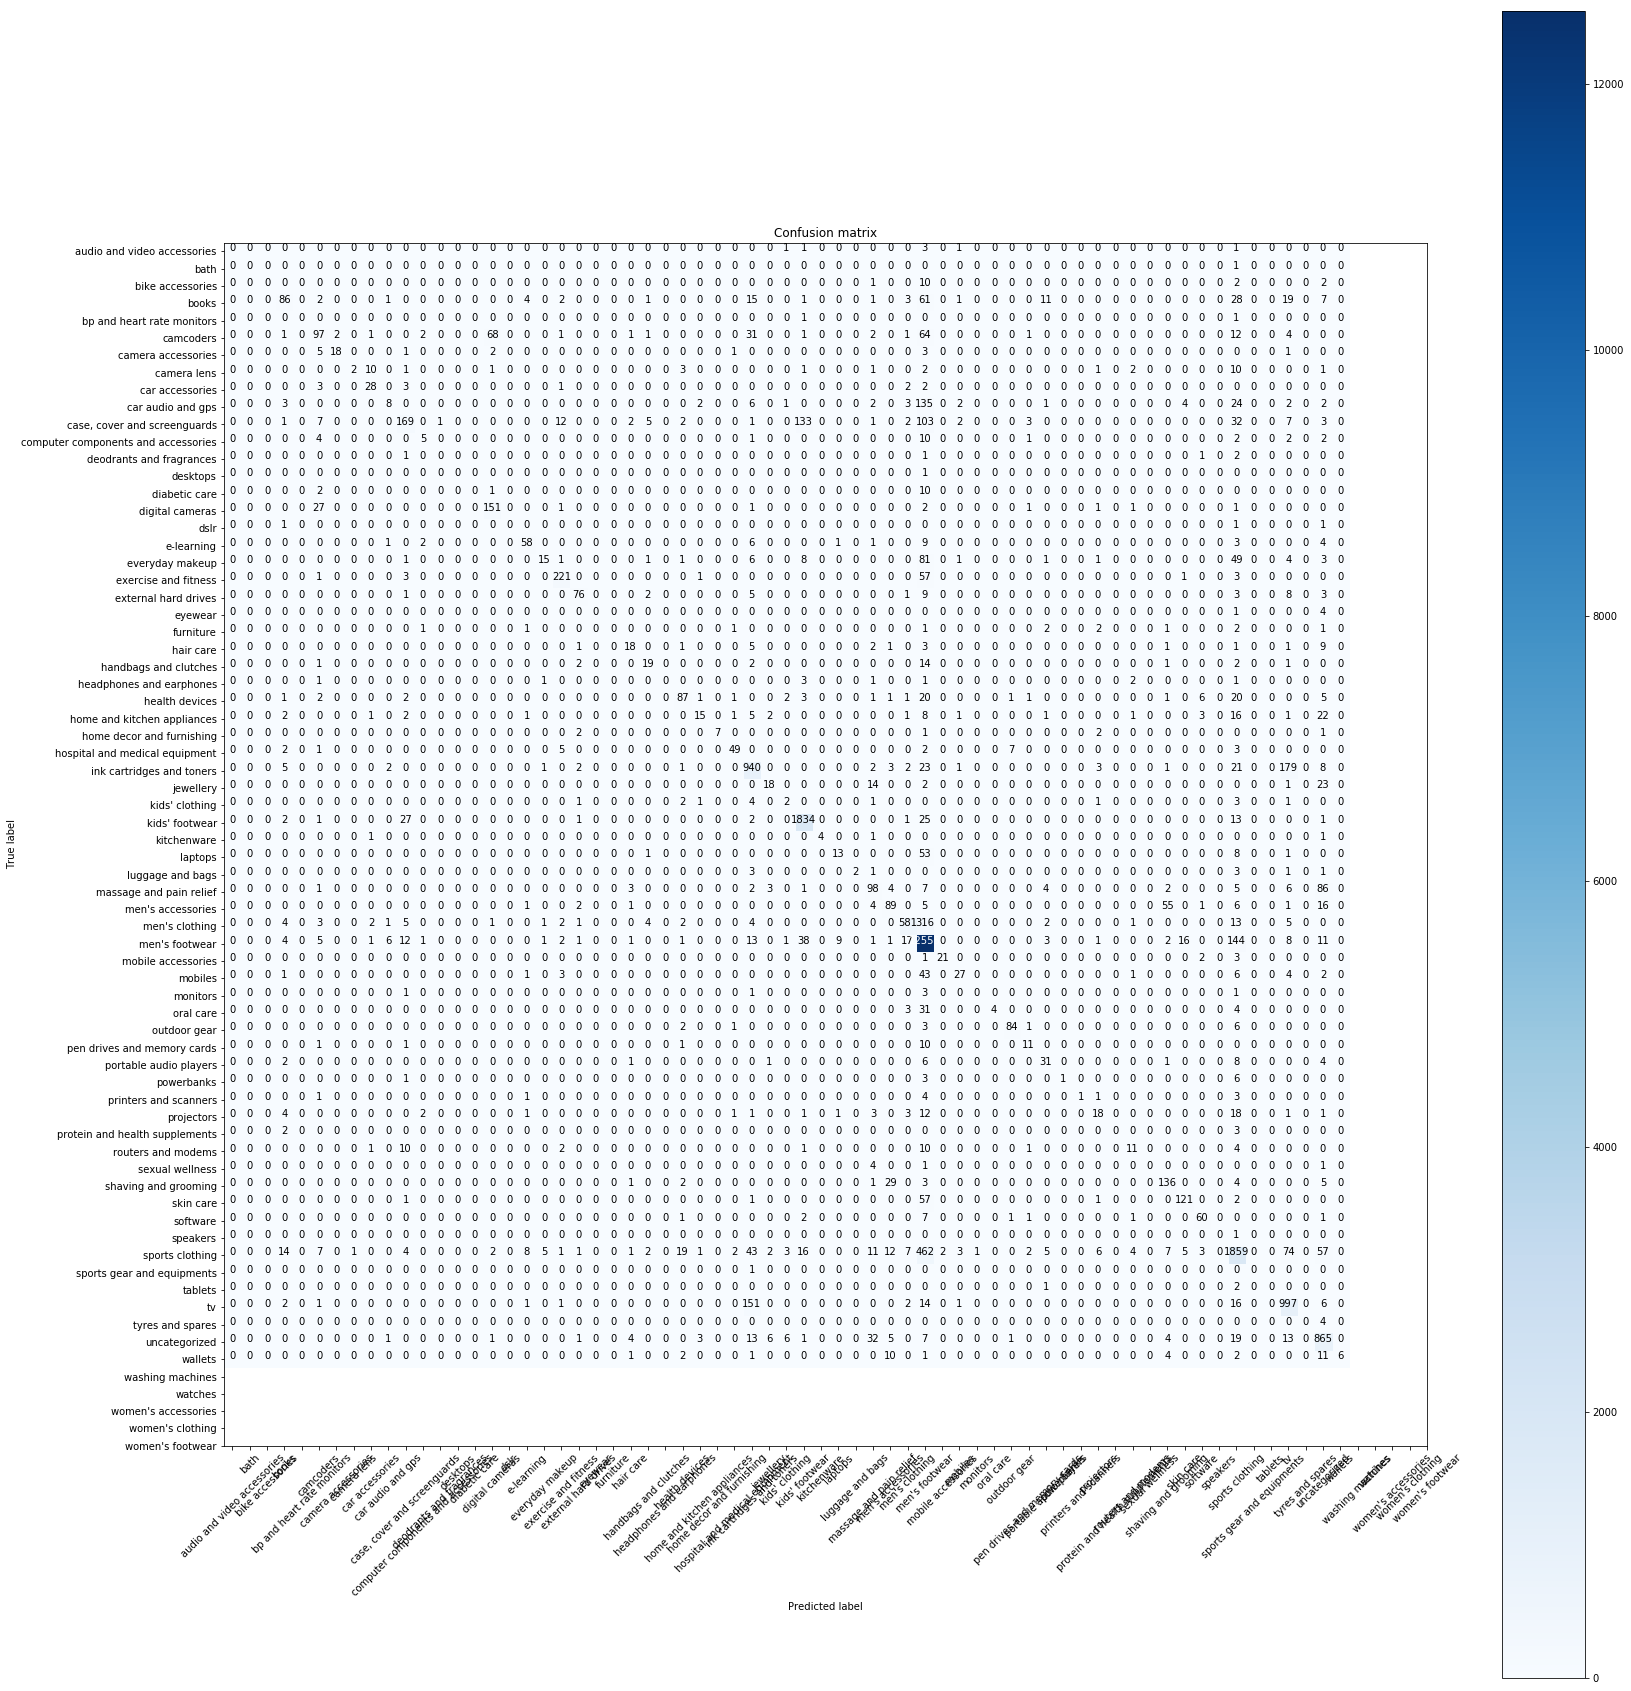

In [21]:
predictions = np.argmax(probs,axis=1)
cm = confusion_matrix(y, predictions)
plot_confusion_matrix_mine(cm,data.classes,normalize=False)

In [22]:
preds = predictions

In [23]:
def rand_by_mask(mask): return np.random.choice(np.where(mask)[0], 4, replace=False)
def rand_by_correct(is_correct): return rand_by_mask((preds == data.val_y)==is_correct)
def plot_val_with_title(idxs, title):
    imgs = np.stack([data.val_ds[x][0] for x in idxs])
    title_probs = [probs[x] for x in idxs]
    print(title)
    return plots(data.val_ds.denorm(imgs), rows=1, titles=title_probs)
def plots(ims, figsize=(12,6), rows=1, titles=None):
    f = plt.figure(figsize=figsize)
    for i in range(len(ims)):
        sp = f.add_subplot(rows, len(ims)//rows, i+1)
        sp.axis('Off')
        if titles is not None: sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i])

In [24]:
def load_img_id(ds, idx): return np.array(PIL.Image.open(PATH+ds.fnames[idx]))

def plot_val_with_title(idxs, title):
    imgs = [load_img_id(data.val_ds,x) for x in idxs]
    title_probs = [probs[x] for x in idxs]
    print(title)
    return plots(imgs, rows=1, titles=title_probs, figsize=(16,8))

In [25]:
PATH= '/home/paperspace/fastai/courses/dl1/data/delhivery/'

Correctly classified


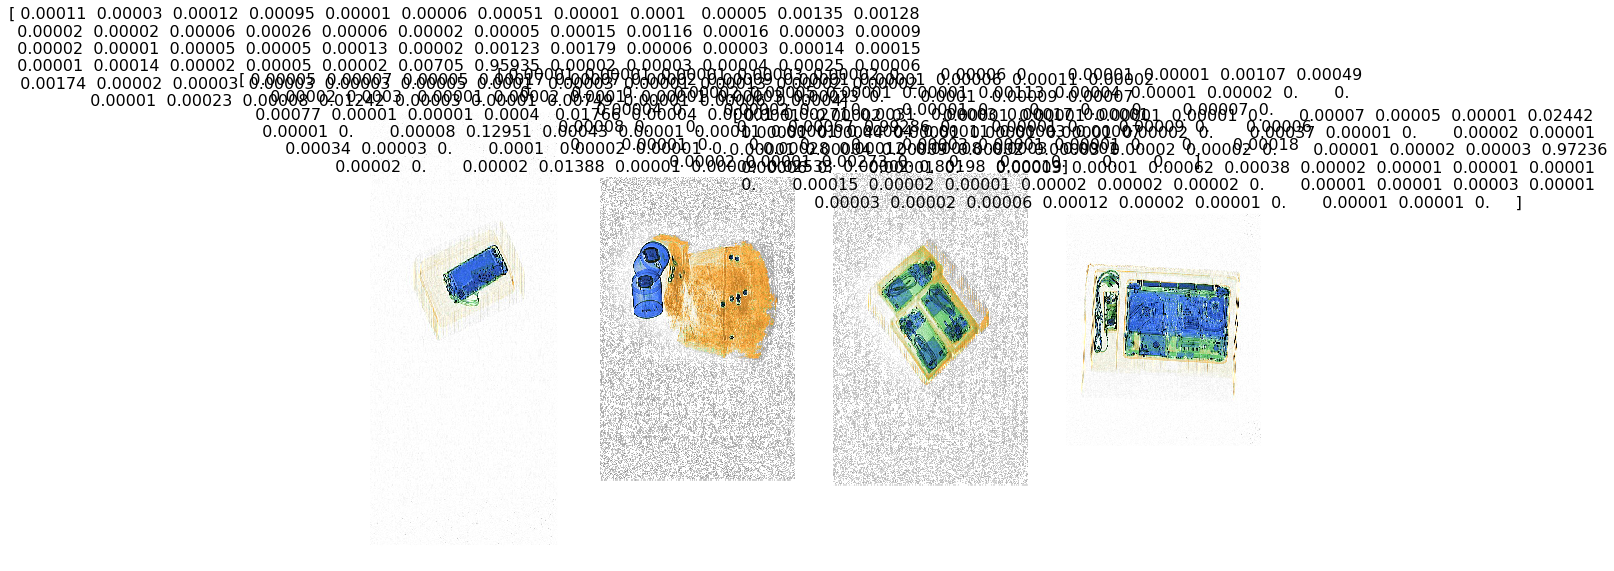

In [26]:
plot_val_with_title(rand_by_correct(True), "Correctly classified")

Incorrectly classified


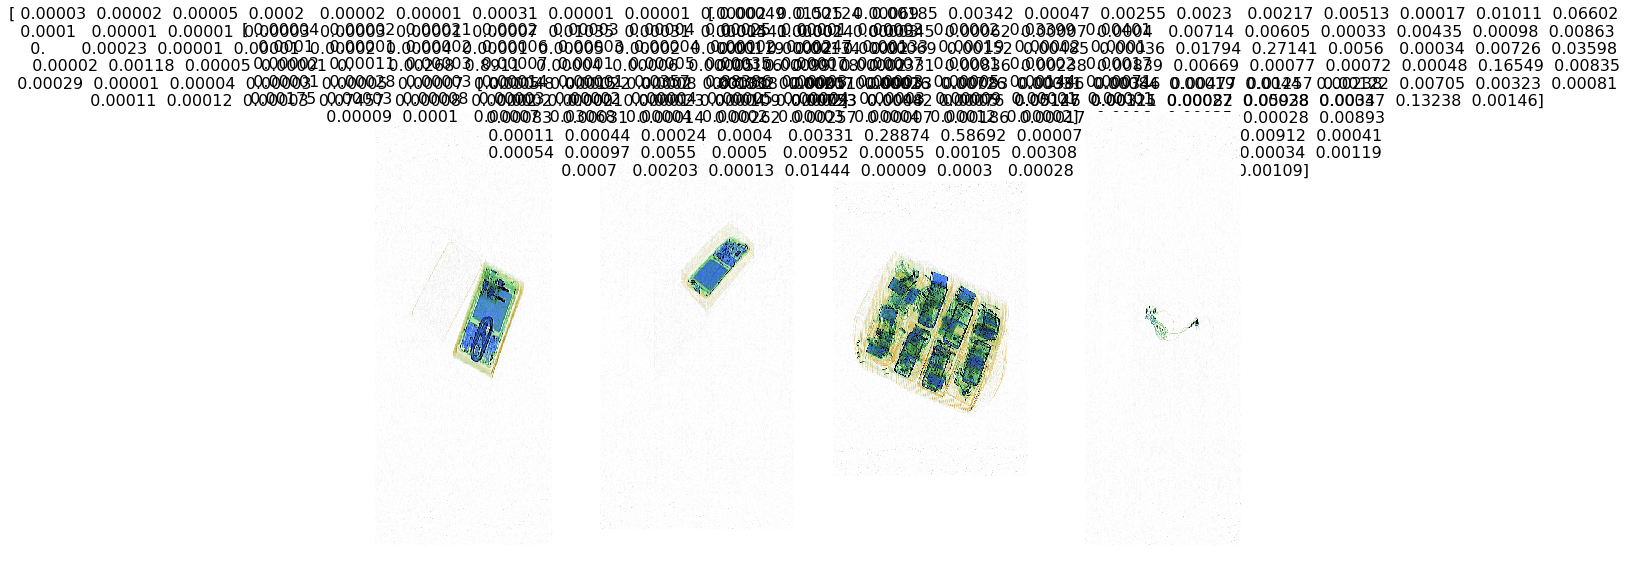

In [27]:
plot_val_with_title(rand_by_correct(False), "Incorrectly classified")

In [28]:
learn.unfreeze()

In [29]:
test_name = '/home/paperspace/fastai/courses/dl1/'+path+'/train/698.jpg'
im = val_tfms(open_image(test_name))
pred = learn.predict_array(im[None])

In [30]:
np.exp(pred)


array([[ 0.00021,  0.00022,  0.00019,  0.0036 ,  0.00011,  0.00025,  0.00582,  0.00056,  0.00068,  0.0002 ,
         0.00272,  0.02709,  0.00067,  0.00011,  0.00023,  0.00085,  0.00092,  0.00034,  0.00042,  0.01944,
         0.04201,  0.00158,  0.00023,  0.00012,  0.00018,  0.00196,  0.00043,  0.00135,  0.00097,  0.00018,
         0.00009,  0.00785,  0.00082,  0.00029,  0.00019,  0.00095,  0.00035,  0.00049,  0.00017,  0.00082,
         0.0003 ,  0.00079,  0.75419,  0.00101,  0.00023,  0.00049,  0.00316,  0.0003 ,  0.00196,  0.00014,
         0.00223,  0.00086,  0.00021,  0.00029,  0.00133,  0.00352,  0.00023,  0.00029,  0.00032,  0.00097,
         0.0026 ,  0.0005 ,  0.00007,  0.0826 ,  0.00024,  0.00018,  0.00629,  0.00011,  0.00866,  0.0003 ]], dtype=float32)

In [31]:
data.classes[np.argmax(pred[0,:])]


'mobiles'

In [32]:
np.exp(pred[0,9])

0.00019822142

In [33]:
data.classes

['audio and video accessories',
 'bath',
 'bike accessories',
 'books',
 'bp and heart rate monitors',
 'camcoders',
 'camera accessories',
 'camera lens',
 'car accessories',
 'car audio and gps',
 'case, cover and screenguards',
 'computer components and accessories',
 'deodrants and fragrances',
 'desktops',
 'diabetic care',
 'digital cameras',
 'dslr',
 'e-learning',
 'everyday makeup',
 'exercise and fitness',
 'external hard drives',
 'eyewear',
 'furniture',
 'hair care',
 'handbags and clutches',
 'headphones and earphones',
 'health devices',
 'home and kitchen appliances',
 'home decor and furnishing',
 'hospital and medical equipment',
 'ink cartridges and toners',
 'jewellery',
 "kids' clothing",
 "kids' footwear",
 'kitchenware',
 'laptops',
 'luggage and bags',
 'massage and pain relief',
 "men's accessories",
 "men's clothing",
 "men's footwear",
 'mobile accessories',
 'mobiles',
 'monitors',
 'oral care',
 'outdoor gear',
 'pen drives and memory cards',
 'portable aud

In [34]:
# data.classes.index('mobiles')
# data.classes.index('watches')
# data.classes.index('laptops')
# data.classes.index("women's clothing")


42  66 35 68

In [35]:
df_test_org = pd.read_csv('apr-test-sub-cat-1.csv',low_memory=False)


In [36]:
df_test_org[:20]


,x_ray_image_file_name,predictions
0,200001.jpg,home decor and furnishing
1,200002.jpg,jewellery
2,200003.jpg,books
3,200004.jpg,mobiles
4,200005.jpg,tablets
5,200006.jpg,tablets
6,200008.jpg,mobiles
7,200010.jpg,uncategorized
8,200011.jpg,watches
9,200012.jpg,eyewear


In [ ]:
for i,row in df_test_org.iterrows():
    pic_name = row['x_ray_image_file_name']
    full_path = '/home/paperspace/fastai/courses/dl1/'+path+'/test/'+pic_name
    image = val_tfms(open_image(full_path))
    pred = learn.predict_array(image[None])
    try:    
        our_pred = row['predictions']
        actual_pred = data.classes[np.argmax(pred[0,:])]
        print(str(i)+" "+our_pred+" "+actual_pred)
        if our_pred != actual_pred and our_pred != 'uncategorized':
            index_of_our_pred = data.classes.index(our_pred)
            if index_of_our_pred == 42 or index_of_our_pred == 66 or index_of_our_pred==35 or index_of_our_pred==68:
                if np.exp(pred[0,index_of_our_pred])<0.3:
                    df_test_org.loc[i,'product_description']=False
                else:
                    df_test_org.loc[i,'product_description']=True

        else:
            df_test_org.loc[i,'product_description']=True
            
            
        
    except:
        df_test_org.loc[i,'product_description']=True
        print("Error")

0 home decor and furnishing women's clothing
1 jewellery mobiles
2 books protein and health supplements
3 mobiles mobiles
4 tablets tablets
5 tablets tablets
6 mobiles mobiles
7 uncategorized watches
8 watches jewellery
9 eyewear skin care
10 jewellery books
11 uncategorized jewellery
12 uncategorized watches
13 uncategorized jewellery
14 uncategorized computer components and accessories
15 mobiles mobiles
16 mobiles mobiles
17 mobiles mobiles
18 laptops mobiles
19 mobiles mobiles
20 mobiles mobiles
21 uncategorized watches
22 kids' clothing men's clothing
23 sports gear and equipments men's footwear
24 men's clothing men's clothing
25 men's clothing men's clothing
26 kids' clothing women's clothing
27 kids' clothing men's clothing
28 mobiles mobiles
29 mobiles mobiles
30 mobiles mobiles
31 mobiles mobiles
32 mobiles mobiles
33 mobiles mobiles
34 jewellery jewellery
35 jewellery jewellery
36 jewellery jewellery
37 jewellery watches
38 jewellery jewellery
39 jewellery jewellery
40 watch

365 mobiles mobiles
366 laptops laptops
367 mobiles mobiles
368 mobiles mobiles
369 mobiles mobiles
370 mobiles mobiles
371 mobiles mobiles
372 mobiles mobiles
373 mobiles mobiles
374 mobiles mobiles
375 mobiles mobiles
376 mobiles mobiles
377 mobiles mobiles
378 mobiles mobiles
379 mobiles mobiles
380 mobiles mobiles
381 mobiles mobiles
382 mobiles mobiles
383 mobiles mobiles
384 home decor and furnishing men's clothing
385 mobiles mobiles
386 mobiles mobiles
387 mobiles mobiles
388 mobiles mobiles
389 mobiles mobiles
390 mobiles books
391 mobiles mobiles
392 mobiles mobiles
393 mobiles mobiles
394 mobiles mobiles
395 mobiles mobiles
396 camera lens camera accessories
397 uncategorized mobiles
398 mobiles mobiles
399 mobiles mobiles
400 mobiles mobiles
401 mobiles mobiles
402 mobiles mobiles
403 mobiles mobiles
404 mobiles mobiles
405 mobiles mobiles
406 mobiles mobiles
407 mobiles mobiles
408 digital cameras mobiles
409 tablets mobiles
410 printers and scanners printers and scanners


736 mobiles mobiles
737 mobiles watches
738 mobiles mobiles
739 mobiles mobiles
740 mobiles mobiles
741 mobiles mobiles
742 mobiles mobiles
743 mobiles mobiles
744 uncategorized books
745 uncategorized uncategorized
746 jewellery mobiles
747 jewellery uncategorized
748 jewellery women's clothing
749 mobiles mobiles
750 mobiles mobiles
751 dslr dslr
752 mobiles mobiles
753 mobiles mobiles
754 mobiles mobiles
755 camera accessories mobiles
756 mobiles mobiles
757 mobiles mobiles
758 mobiles mobiles
759 laptops mobiles
760 mobiles mobiles
761 mobiles mobiles
762 mobiles mobiles
763 dslr dslr
764 mobiles mobiles
765 mobiles mobiles
766 dslr dslr
767 mobiles mobiles
768 mobiles mobiles
769 mobiles mobiles
770 mobiles mobiles
771 dslr dslr
772 jewellery jewellery
773 watches watches
774 jewellery jewellery
775 jewellery watches
776 uncategorized uncategorized
777 uncategorized mobile accessories
778 pen drives and memory cards everyday makeup
779 uncategorized women's clothing
780 mobiles ds

1105 tablets tablets
1106 tablets tablets
1107 tablets tablets
1108 tablets tablets
1109 tablets tablets
1110 tablets tablets
1111 tablets tablets
1112 mobiles mobiles
1113 mobiles mobiles
1114 mobiles mobiles
1115 mobiles mobiles
1116 mobiles mobiles
1117 mobiles mobiles
1118 mobiles mobiles
1119 kids' clothing women's clothing
1120 computer components and accessories computer components and accessories
1121 computer components and accessories computer components and accessories
1122 computer components and accessories laptops
1123 computer components and accessories computer components and accessories
1124 mobiles mobiles
1125 uncategorized computer components and accessories
1126 case, cover and screenguards mobiles
1127 computer components and accessories computer components and accessories
1128 mobiles dslr
1129 camera accessories dslr
1130 camera accessories dslr
1131 camera accessories dslr
1132 camera accessories dslr
1133 camera accessories camera accessories
1134 mobiles dslr

1442 kids' clothing women's clothing
1443 kids' clothing women's clothing
1444 mobiles mobiles
1445 mobiles mobiles
1446 mobiles mobiles
1447 mobiles mobiles
1448 mobiles mobiles
1449 mobiles mobiles
1450 mobiles mobiles
1451 tv tv
1452 tv tv
1453 tv tv
1454 tv tv
1455 home and kitchen appliances tv
1456 home and kitchen appliances tv
1457 home and kitchen appliances tv
1458 tablets mobiles
1459 mobiles mobiles
1460 mobiles mobiles
1461 mobiles mobiles
1462 watches watches
1463 uncategorized watches
1464 dslr dslr
1465 laptops laptops
1466 laptops jewellery
1467 mobiles mobiles
1468 dslr dslr
1469 projectors projectors
1470 tablets mobiles
1471 mobiles mobiles
1472 mobiles mobiles
1473 mobiles mobiles
1474 car accessories computer components and accessories
1475 mobiles laptops
1476 mobiles mobiles
1477 mobiles mobiles
1478 printers and scanners dslr
1479 speakers speakers
1480 printers and scanners printers and scanners
1481 uncategorized uncategorized
1482 uncategorized uncategorized

1793 mobiles mobiles
1794 tablets tablets
1795 tablets tablets
1796 mobiles mobiles
1797 mobiles mobiles
1798 mobiles mobiles
1799 mobiles mobiles
1800 mobiles mobile accessories
1801 mobiles mobile accessories
1802 mobiles mobiles
1803 mobiles mobiles
1804 mobiles mobile accessories
1805 mobiles books
1806 mobiles mobile accessories
1807 mobiles mobile accessories
1808 mobiles mobile accessories
1809 mobiles mobile accessories
1810 mobile accessories mobiles
1811 mobile accessories mobile accessories
1812 mobile accessories mobiles
1813 mobiles mobiles
1814 mobiles mobiles
1815 mobile accessories mobile accessories
1816 mobiles mobiles
1817 mobiles mobiles
1818 mobiles mobiles
1819 mobiles mobiles
1820 mobiles laptops
1821 mobiles mobiles
1822 mobiles mobiles
1823 mobiles mobiles
1824 mobiles mobiles
1825 mobiles mobiles
1826 mobiles mobiles
1827 mobiles mobiles
1828 mobiles mobiles
1829 mobiles mobiles
1830 mobiles mobiles
1831 mobiles mobiles
1832 printers and scanners laptops
1833 

2141 tablets tablets
2142 tablets tablets
2143 tablets tablets
2144 mobiles mobiles
2145 mobiles mobiles
2146 mobiles mobiles
2147 mobiles mobiles
2148 mobiles mobiles
2149 mobiles mobiles
2150 mobiles mobiles
2151 mobiles mobiles
2152 mobiles mobiles
2153 camera lens camera lens
2154 dslr dslr
2155 mobiles mobiles
2156 mobiles mobiles
2157 mobiles mobiles
2158 tablets tablets
2159 tablets mobiles
2160 tablets tablets
2161 tablets tablets
2162 mobiles mobiles
2163 tablets tablets
2164 tablets tablets
2165 tablets tablets
2166 tablets tablets
2167 tablets tablets
2168 tablets tablets
2169 tablets mobiles
2170 mobiles mobiles
2171 mobiles mobiles
2172 tablets tablets
2173 mobiles mobiles
2174 mobiles mobiles
2175 mobiles mobiles
2176 mobiles mobiles
2177 mobiles mobiles
2178 mobiles mobiles
2179 mobiles mobiles
2180 mobiles mobiles
2181 mobiles mobiles
2182 mobiles mobiles
2183 mobiles mobiles
2184 women's clothing mobiles
2185 mobiles mobiles
2186 mobiles mobiles
2187 mobiles mobiles
21

2485 dslr dslr
2486 mobiles mobiles
2487 laptops laptops
2488 watches mobiles
2489 laptops laptops
2490 dslr dslr
2491 watches watches
2492 mobiles mobiles
2493 laptops laptops
2494 watches watches
2495 mobiles mobiles
2496 tablets mobiles
2497 mobiles mobiles
2498 tablets tablets
2499 tablets tablets
2500 tablets mobiles
2501 tablets tablets
2502 tablets tablets
2503 tablets tablets
2504 mobiles mobiles
2505 mobiles mobiles
2506 mobiles mobiles
2507 mobiles mobiles
2508 uncategorized women's clothing
2509 mobiles mobiles
2510 mobiles mobiles
2511 mobiles mobiles
2512 mobiles mobiles
2513 mobiles mobiles
2514 mobiles mobiles
2515 mobiles mobiles
2516 mobiles mobiles
2517 mobiles mobiles
2518 mobiles mobiles
2519 laptops laptops
2520 mobiles mobiles
2521 dslr dslr
2522 mobiles mobiles
2523 mobiles mobiles
2524 case, cover and screenguards mobiles
2525 mobiles mobiles
2526 mobiles mobiles
2527 mobiles mobiles
2528 mobiles mobiles
2529 mobiles mobiles
2530 mobiles mobiles
2531 mobiles mob

2847 mobiles mobiles
2848 mobiles mobiles
2849 mobiles mobiles
2850 mobiles mobiles
2851 mobiles mobiles
2852 mobiles mobiles
2853 mobiles mobiles
2854 tablets tablets
2855 mobiles mobiles
2856 digital cameras camera accessories
2857 uncategorized uncategorized
2858 laptops laptops
2859 uncategorized books
2860 camera accessories mobiles
2861 computer components and accessories computer components and accessories
2862 computer components and accessories computer components and accessories
2863 computer components and accessories computer components and accessories
2864 laptops laptops
2865 mobiles mobiles
2866 mobiles mobiles
2867 mobiles mobiles
2868 mobiles mobiles
2869 mobiles mobiles
2870 dslr dslr
2871 mobiles books
2872 mobiles mobiles
2873 mobiles mobiles
2874 mobiles mobiles
2875 mobiles mobiles
2876 mobiles mobiles
2877 mobiles mobiles
2878 mobiles mobiles
2879 mobiles mobiles
2880 mobiles mobiles
2881 laptops laptops
2882 laptops laptops
2883 mobiles laptops
2884 mobiles mobi

3176 mobiles mobiles
3177 mobiles mobiles
3178 watches mobiles
3179 mobiles mobiles
3180 mobiles mobiles
3181 mobiles mobiles
3182 mobiles mobiles
3183 mobiles mobiles
3184 mobiles mobiles
3185 mobiles mobiles
3186 mobiles mobiles
3187 mobiles mobiles
3188 mobiles mobiles
3189 mobiles mobiles
3190 luggage and bags luggage and bags
3191 laptops laptops
3192 mobiles mobiles
3193 mobiles mobiles
3194 mobiles mobiles
3195 camera accessories dslr
3196 mobiles mobiles
3197 mobiles mobiles
3198 watches watches
3199 mobiles laptops
3200 mobiles mobiles
3201 laptops laptops
3202 uncategorized mobiles
3203 mobiles mobiles
3204 mobile accessories mobile accessories
3205 mobile accessories mobiles
3206 mobile accessories mobile accessories
3207 mobile accessories mobiles
3208 mobiles mobiles
3209 mobiles mobiles
3210 mobiles mobiles
3211 watches laptops
3212 mobiles mobiles
3213 mobiles laptops
3214 mobiles computer components and accessories
3215 mobiles mobiles
3216 mobiles mobiles
3217 mobiles 

3490 computer components and accessories watches
3491 sports gear and equipments men's footwear
3492 car audio and gps protein and health supplements
3493 mobiles mobiles
3494 shaving and grooming uncategorized
3495 mobiles watches
3496 mobiles mobiles
3497 mobiles mobiles
3498 sports gear and equipments men's footwear
3499 computer components and accessories mobiles
3500 watches watches
3501 jewellery jewellery
3502 camera accessories camera accessories
3503 men's clothing women's clothing
3504 massage and pain relief mobiles
3505 watches watches
3506 mobiles eyewear
3507 mobiles mobiles
3508 mobiles watches
3509 mobiles mobiles
3510 mobiles mobiles
3511 mobiles mobiles
3512 mobiles mobiles
3513 mobiles mobiles
3514 mobiles mobiles
3515 mobiles mobiles
3516 mobiles mobiles
3517 home and kitchen appliances ink cartridges and toners
3518 jewellery jewellery
3519 jewellery jewellery
3520 jewellery watches
3521 uncategorized uncategorized
3522 jewellery watches
3523 uncategorized uncatego

3735 uncategorized women's clothing
3736 uncategorized men's footwear
3737 uncategorized women's clothing
3738 uncategorized women's clothing
3739 uncategorized men's footwear
3740 uncategorized jewellery
3741 uncategorized women's clothing
3742 uncategorized women's clothing
3743 uncategorized men's footwear
3744 uncategorized men's footwear
3745 uncategorized uncategorized
3746 uncategorized women's clothing
3747 uncategorized men's footwear
3748 uncategorized uncategorized
3749 uncategorized women's clothing
3750 uncategorized uncategorized
3751 uncategorized mobiles
3752 uncategorized men's footwear
3753 uncategorized women's clothing
3754 uncategorized men's footwear
3755 uncategorized men's footwear
3756 uncategorized women's clothing
3757 uncategorized women's clothing
3758 uncategorized eyewear
3759 uncategorized women's clothing
3760 uncategorized protein and health supplements
3761 uncategorized women's clothing
3762 uncategorized sports gear and equipments
3763 uncategorized

3975 uncategorized eyewear
3976 uncategorized eyewear
3977 uncategorized women's clothing
3978 uncategorized women's clothing
3979 uncategorized men's footwear
3980 uncategorized men's footwear
3981 uncategorized women's clothing
3982 uncategorized women's clothing
3983 uncategorized women's clothing
3984 uncategorized men's footwear
3985 uncategorized men's footwear
3986 uncategorized women's clothing
3987 uncategorized women's clothing
3988 uncategorized women's clothing
3989 uncategorized women's clothing
3990 uncategorized sports gear and equipments
3991 uncategorized women's clothing
3992 uncategorized women's clothing
3993 uncategorized women's clothing
3994 uncategorized sports gear and equipments
3995 uncategorized women's clothing
3996 uncategorized women's clothing
3997 uncategorized men's footwear
3998 uncategorized women's clothing
3999 uncategorized mobiles
4000 uncategorized uncategorized
4001 uncategorized sports gear and equipments
4002 uncategorized women's clothing
40

4251 mobiles mobiles
4252 mobiles mobiles
4253 tablets tablets
4254 tablets tablets
4255 mobiles mobiles
4256 mobiles mobiles
4257 tablets tablets
4258 tablets mobiles
4259 mobiles mobiles
4260 mobiles mobiles
4261 mobiles mobiles
4262 mobiles mobiles
4263 mobiles mobiles
4264 mobiles mobiles
4265 mobiles mobiles
4266 mobiles mobiles
4267 mobiles mobiles
4268 mobiles mobiles
4269 tablets mobiles
4270 mobiles mobiles
4271 mobiles mobiles
4272 tablets mobiles
4273 mobiles mobiles
4274 tablets tablets
4275 mobiles mobiles
4276 tablets tablets
4277 mobiles mobiles
4278 mobiles mobiles
4279 mobiles mobiles
4280 mobiles mobiles
4281 mobiles mobiles
4282 mobiles mobiles
4283 mobiles mobiles
4284 mobiles mobiles
4285 tablets tablets
4286 tablets tablets
4287 mobiles mobiles
4288 tablets tablets
4289 tablets tablets
4290 mobiles mobiles
4291 tablets tablets
4292 tablets tablets
4293 mobiles mobiles
4294 tablets tablets
4295 mobiles mobiles
4296 mobiles mobiles
4297 mobiles mobiles
4298 mobiles 

4643 mobiles mobiles
4644 mobiles mobiles
4645 mobiles mobiles
4646 mobiles mobiles
4647 mobiles mobiles
4648 mobiles mobiles
4649 mobiles mobiles
4650 mobiles mobiles
4651 mobiles mobiles
4652 mobiles mobiles
4653 tablets tablets
4654 mobiles mobiles
4655 mobiles mobiles
4656 mobiles mobiles
4657 mobiles mobiles
4658 mobiles mobiles
4659 mobiles mobiles
4660 mobiles mobiles
4661 mobiles mobiles
4662 mobiles mobiles
4663 mobiles mobiles
4664 tablets tablets
4665 mobiles mobiles
4666 tablets tablets
4667 tablets tablets
4668 tablets tablets
4669 tablets tablets
4670 mobiles mobiles
4671 tablets tablets
4672 tablets tablets
4673 tablets tablets
4674 tablets tablets
4675 tablets tablets
4676 tablets tablets
4677 tablets tablets
4678 tablets tablets
4679 tablets mobiles
4680 tablets tablets
4681 tablets mobiles
4682 camera accessories mobiles
4683 tablets tablets
4684 mobiles mobiles
4685 camera accessories mobiles
4686 tablets mobiles
4687 mobiles mobiles
4688 tablets tablets
4689 tablets

5027 mobiles mobiles
5028 tablets tablets
5029 mobiles mobiles
5030 tablets tablets
5031 tablets tablets
5032 tablets tablets
5033 tablets mobiles
5034 tablets tablets
5035 mobiles mobiles
5036 mobiles mobiles
5037 tablets tablets
5038 mobiles mobiles
5039 tablets tablets
5040 watches mobiles
5041 mobile accessories mobiles
5042 mobiles mobiles
5043 mobiles mobiles
5044 tablets tablets
5045 tablets tablets
5046 mobiles mobiles
5047 tablets tablets
5048 mobiles mobiles
5049 tablets tablets
5050 mobiles mobiles
5051 tablets tablets
5052 mobiles mobiles
5053 tablets tablets
5054 mobiles mobiles
5055 mobiles mobiles
5056 tablets tablets
5057 mobiles mobiles
5058 mobiles mobiles
5059 mobiles mobiles
5060 mobiles mobiles
5061 mobiles mobiles
5062 mobiles mobiles
5063 mobiles mobiles
5064 mobiles mobiles
5065 mobiles mobiles
5066 mobiles mobiles
5067 mobiles mobiles
5068 mobiles mobiles
5069 mobiles mobiles
5070 mobiles mobiles
5071 tablets mobiles
5072 tablets mobiles
5073 tablets tablets
50

5418 tablets tablets
5419 tablets tablets
5420 tablets tablets
5421 mobiles mobiles
5422 mobiles mobiles
5423 mobiles mobiles
5424 mobiles mobiles
5425 mobiles mobiles
5426 mobiles mobiles
5427 mobiles mobiles
5428 tablets mobiles
5429 tablets tablets
5430 tablets tablets
5431 mobiles mobiles
5432 tablets tablets
5433 mobiles mobiles
5434 mobiles mobiles
5435 mobiles mobiles
5436 mobiles mobiles
5437 mobiles mobiles
5438 mobiles mobiles
5439 mobiles mobiles
5440 mobiles mobiles
5441 mobiles mobiles
5442 mobiles mobiles
5443 mobiles mobiles
5444 mobiles mobiles
5445 mobiles mobiles
5446 tablets tablets
5447 tablets mobiles
5448 mobiles mobiles
5449 tablets tablets
5450 tablets tablets
5451 mobiles mobiles
5452 tablets tablets
5453 mobiles mobiles
5454 tablets tablets
5455 tablets tablets
5456 mobiles mobiles
5457 mobiles mobiles
5458 mobiles mobiles
5459 mobiles mobiles
5460 mobiles mobiles
5461 mobiles mobiles
5462 mobiles mobiles
5463 mobiles mobiles
5464 mobiles mobiles
5465 mobiles 

5759 car audio and gps car audio and gps
5760 car audio and gps car audio and gps
5761 car audio and gps mobiles
5762 car audio and gps car audio and gps
5763 car audio and gps car audio and gps
5764 laptops laptops
5765 laptops laptops
5766 mobiles mobiles
5767 laptops laptops
5768 dslr dslr
5769 car audio and gps car audio and gps
5770 car audio and gps mobiles
5771 car audio and gps car audio and gps
5772 car audio and gps mobiles
5773 car audio and gps mobiles
5774 car audio and gps car audio and gps
5775 car audio and gps mobiles
5776 car audio and gps car audio and gps
5777 car audio and gps car audio and gps
5778 car audio and gps mobiles
5779 car audio and gps car audio and gps
5780 mobiles car audio and gps
5781 car audio and gps car audio and gps
5782 car audio and gps car audio and gps
5783 car audio and gps car audio and gps
5784 mobiles car audio and gps
5785 mobiles mobiles
5786 mobiles mobiles
5787 mobiles mobiles
5788 mobiles mobiles
5789 mobiles mobiles
5790 car access

6111 mobiles mobiles
6112 tablets mobiles
6113 tablets tablets
6114 tablets tablets
6115 tablets tablets
6116 mobiles mobiles
6117 mobiles mobiles
6118 mobiles mobiles
6119 tablets tablets
6120 tablets tablets
6121 tablets mobiles
6122 mobiles mobiles
6123 mobiles mobiles
6124 tablets mobiles
6125 mobiles mobiles
6126 tablets tablets
6127 mobiles mobiles
6128 mobiles mobiles
6129 mobiles mobiles
6130 tablets tablets
6131 mobiles mobiles
6132 mobiles mobiles
6133 mobiles mobiles
6134 tablets mobiles
6135 tablets tablets
6136 tablets tablets
6137 mobiles mobiles
6138 mobiles mobiles
6139 tablets tablets
6140 tablets tablets
6141 tablets tablets
6142 mobiles mobiles
6143 mobiles mobiles
6144 tablets tablets
6145 mobiles mobiles
6146 mobiles mobiles
6147 mobiles mobiles
6148 tablets mobiles
6149 tablets tablets
6150 tablets mobiles
6151 mobiles mobiles
6152 tablets tablets
6153 tablets tablets
6154 tablets tablets
6155 mobiles mobiles
6156 dslr mobiles
6157 mobiles mobiles
6158 tablets tab

6496 mobiles mobiles
6497 mobiles mobiles
6498 mobiles mobiles
6499 mobiles mobiles
6500 mobiles mobiles
6501 mobiles mobiles
6502 mobiles mobiles
6503 mobiles mobiles
6504 mobiles mobiles
6505 mobiles mobiles
6506 tablets tablets
6507 tablets tablets
6508 mobiles mobiles
6509 tablets tablets
6510 tablets mobiles
6511 mobiles mobiles
6512 mobiles mobiles
6513 tv mobiles
6514 tablets tablets
6515 mobiles mobiles
6516 mobiles mobiles
6517 mobiles mobiles
6518 tablets tablets
6519 mobiles mobiles
6520 tablets tablets
6521 mobiles mobiles
6522 mobiles mobiles
6523 mobiles mobiles
6524 mobiles mobiles
6525 mobiles mobiles
6526 tablets tablets
6527 mobiles mobiles
6528 tablets tablets
6529 mobiles mobiles
6530 mobiles mobiles
6531 mobiles mobiles
6532 mobiles mobiles
6533 tablets tablets
6534 tablets tablets
6535 tablets tablets
6536 tablets tablets
6537 tablets tablets
6538 tablets tablets
6539 tablets tablets
6540 mobiles mobiles
6541 tablets tablets
6542 mobiles mobiles
6543 mobiles mobil

6888 mobiles mobiles
6889 tablets tablets
6890 tablets tablets
6891 mobiles mobiles
6892 tablets tablets
6893 tablets tablets
6894 tablets tablets
6895 mobiles mobiles
6896 tablets uncategorized
6897 tablets tablets
6898 tablets tablets
6899 tablets tablets
6900 mobiles mobiles
6901 tablets tablets
6902 tablets tablets
6903 tablets tablets
6904 tablets tablets
6905 tablets tablets
6906 mobiles mobiles
6907 tablets tablets
6908 mobiles mobiles
6909 tablets mobiles
6910 mobiles mobiles
6911 mobiles mobiles
6912 mobiles mobiles
6913 tablets tablets
6914 tablets mobiles
6915 mobiles mobiles
6916 mobiles mobiles
6917 mobiles mobiles
6918 mobiles mobiles
6919 mobiles mobiles
6920 tablets tablets
6921 tablets tablets
6922 tablets tablets
6923 tablets tablets
6924 tablets tablets
6925 tablets tablets
6926 tablets mobiles
6927 tablets tablets
6928 tablets tablets
6929 tablets tablets
6930 tablets tablets
6931 tablets tablets
6932 tablets tablets
6933 tablets tablets
6934 tablets tablets
6935 ta

7216 uncategorized uncategorized
7217 uncategorized uncategorized
7218 uncategorized uncategorized
7219 uncategorized mobiles
7220 uncategorized uncategorized
7221 uncategorized uncategorized
7222 uncategorized mobiles
7223 uncategorized mobiles
7224 uncategorized mobiles
7225 uncategorized mobiles
7226 uncategorized mobiles
7227 uncategorized uncategorized
7228 uncategorized uncategorized
7229 uncategorized mobiles
7230 uncategorized mobiles
7231 uncategorized mobiles
7232 uncategorized mobiles
7233 uncategorized uncategorized
7234 uncategorized uncategorized
7235 uncategorized uncategorized
7236 uncategorized uncategorized
7237 uncategorized uncategorized
7238 uncategorized uncategorized
7239 uncategorized mobiles
7240 uncategorized uncategorized
7241 uncategorized uncategorized
7242 uncategorized uncategorized
7243 uncategorized uncategorized
7244 uncategorized uncategorized
7245 uncategorized uncategorized
7246 uncategorized uncategorized
7247 uncategorized uncategorized
7248 uncat

7532 tablets tablets
7533 mobiles mobiles
7534 mobiles mobiles
7535 mobiles mobiles
7536 mobiles mobiles
7537 mobiles mobiles
7538 mobiles mobiles
7539 mobiles mobiles
7540 mobiles mobiles
7541 mobiles mobiles
7542 skin care skin care
7543 mobiles mobiles
7544 mobiles mobiles
7545 mobiles mobiles
7546 mobiles mobiles
7547 mobiles mobiles
7548 mobiles mobiles
7549 mobiles mobiles
7550 mobiles mobiles
7551 mobiles mobiles
7552 mobiles mobiles
7553 tablets tablets
7554 hair care uncategorized
7555 mobiles mobiles
7556 skin care skin care
7557 mobiles mobiles
7558 mobiles mobiles
7559 mobiles mobiles
7560 mobiles mobiles
7561 mobiles mobiles
7562 mobiles mobiles
7563 mobiles mobiles
7564 mobiles mobiles
7565 mobiles mobiles
7566 mobiles mobiles
7567 mobiles mobiles
7568 mobiles mobiles
7569 mobiles mobiles
7570 mobiles mobiles
7571 mobiles mobiles
7572 tablets tablets
7573 tablets tablets
7574 mobiles mobiles
7575 mobiles mobiles
7576 mobiles mobiles
7577 mobiles mobiles
7578 mobiles mobil

7862 uncategorized jewellery
7863 uncategorized jewellery
7864 uncategorized mobiles
7865 mobiles mobiles
7866 uncategorized uncategorized
7867 mobiles mobiles
7868 uncategorized mobiles
7869 mobiles mobiles
7870 mobiles mobiles
7871 mobiles mobiles
7872 mobiles mobiles
7873 mobiles uncategorized
7874 mobiles mobiles
7875 mobiles mobiles
7876 mobiles mobiles
7877 mobiles mobiles
7878 mobiles mobiles
7879 mobiles mobiles
7880 mobiles mobiles
7881 mobiles mobiles
7882 mobiles mobiles
7883 mobiles mobiles
7884 mobiles mobiles
7885 mobiles mobiles
7886 mobile accessories mobiles
7887 women's footwear women's clothing
7888 mobiles mobiles
7889 mobiles mobiles
7890 mobiles mobiles
7891 mobiles mobiles
7892 laptops laptops
7893 mobiles car audio and gps
7894 mobiles mobiles
7895 home and kitchen appliances monitors
7896 case, cover and screenguards uncategorized
7897 men's footwear men's footwear
7898 case, cover and screenguards ink cartridges and toners
7899 case, cover and screenguards mob

8155 mobiles mobiles
8156 mobiles mobiles
8157 mobiles mobiles
8158 mobiles mobiles
8159 mobiles mobiles
8160 mobiles mobiles
8161 mobiles mobiles
8162 mobiles mobiles
8163 mobiles mobiles
8164 mobiles mobiles
8165 home and kitchen appliances mobiles
8166 mobiles mobiles
8167 mobiles mobiles
8168 mobiles mobiles
8169 mobiles mobiles
8170 mobiles mobiles
8171 mobiles mobiles
8172 mobiles mobiles
8173 mobiles mobiles
8174 mobiles mobiles
8175 mobiles mobiles
8176 mobiles mobiles
8177 mobiles mobiles
8178 mobiles mobiles
8179 mobiles mobiles
8180 mobiles mobiles
8181 mobiles mobiles
8182 mobiles mobiles
8183 mobiles mobiles
8184 mobiles mobiles
8185 mobiles mobiles
8186 mobiles mobiles
8187 mobiles mobiles
8188 mobiles mobiles
8189 mobiles mobiles
8190 mobiles mobiles
8191 mobiles mobiles
8192 mobiles mobiles
8193 mobiles mobiles
8194 mobiles mobiles
8195 mobiles mobiles
8196 mobiles mobiles
8197 mobiles mobiles
8198 mobiles mobiles
8199 mobiles mobiles
8200 mobiles mobiles
8201 mobiles m

8537 mobiles mobiles
8538 mobiles mobiles
8539 mobiles uncategorized
8540 mobiles mobiles
8541 mobiles mobiles
8542 mobiles mobiles
8543 mobiles mobiles
8544 mobiles mobiles
8545 mobiles mobiles
8546 mobiles mobiles
8547 mobiles mobiles
8548 mobiles uncategorized
8549 mobiles mobiles
8550 mobiles mobiles
8551 mobiles mobiles
8552 mobiles mobiles
8553 mobiles mobiles
8554 mobiles mobiles
8555 mobiles mobiles
8556 mobiles mobiles
8557 shaving and grooming camera accessories
8558 mobiles mobiles
8559 mobiles mobiles
8560 mobiles mobiles
8561 mobiles mobiles
8562 mobiles mobiles
8563 mobiles mobiles
8564 mobiles mobiles
8565 mobiles mobiles
8566 mobiles mobiles
8567 mobiles mobiles
8568 mobiles mobiles
8569 mobiles mobiles
8570 car audio and gps dslr
8571 mobiles mobiles
8572 mobiles mobiles
8573 mobiles mobiles
8574 mobiles mobiles
8575 mobiles mobiles
8576 mobiles mobiles
8577 mobiles mobiles
8578 mobiles mobiles
8579 laptops mobiles
8580 mobiles mobiles
8581 mobiles mobiles
8582 mobiles

8920 mobiles mobiles
8921 mobiles mobiles
8922 mobiles mobiles
8923 mobiles mobiles
8924 mobiles mobiles
8925 mobiles mobiles
8926 mobiles mobiles
8927 mobiles mobiles
8928 mobiles mobiles
8929 mobiles mobiles
8930 mobiles mobiles
8931 mobiles mobiles
8932 mobiles mobiles
8933 mobiles mobiles
8934 mobiles mobiles
8935 mobiles mobiles
8936 dslr camera accessories
8937 mobiles mobiles
8938 mobiles mobiles
8939 laptops mobiles
8940 mobiles mobiles
8941 mobiles mobiles
8942 tv mobiles
8943 mobiles jewellery
8944 mobiles mobiles
8945 mobiles mobiles
8946 mobiles mobiles
8947 mobiles mobiles
8948 mobiles mobiles
8949 mobiles mobiles
8950 mobiles mobiles
8951 laptops mobiles
8952 mobiles mobiles
8953 mobiles mobiles
8954 mobiles mobiles
8955 mobiles mobiles
8956 mobiles mobiles
8957 mobiles mobiles
8958 mobiles mobiles
8959 mobiles mobiles
8960 mobiles mobiles
8961 mobiles mobiles
8962 mobiles mobiles
8963 mobiles mobiles
8964 mobiles mobiles
8965 mobiles mobiles
8966 mobiles mobiles
8967 mob

9307 mobiles mobiles
9308 mobiles mobiles
9309 mobiles mobiles
9310 mobiles mobiles
9311 women's clothing mobiles
9312 mobiles mobiles
9313 mobiles mobiles
9314 mobiles mobiles
9315 mobiles mobiles
9316 mobile accessories mobiles
9317 mobiles mobiles
9318 mobiles mobiles
9319 mobiles mobiles
9320 mobiles mobiles
9321 tablets mobiles
9322 mobiles mobiles
9323 mobiles mobiles
9324 mobiles mobiles
9325 mobiles mobiles
9326 mobiles mobiles
9327 mobiles mobiles
9328 women's clothing mobiles
9329 mobiles mobiles
9330 mobiles mobiles
9331 mobiles mobiles
9332 mobiles mobiles
9333 mobiles mobiles
9334 mobiles mobiles
9335 mobiles mobiles
9336 mobiles mobiles
9337 mobiles mobiles
9338 uncategorized mobiles
9339 mobiles mobiles
9340 mobiles mobiles
9341 mobiles mobiles
9342 mobiles mobiles
9343 mobiles mobiles
9344 mobiles mobiles
9345 mobiles mobiles
9346 mobiles mobiles
9347 mobiles mobiles
9348 mobiles mobiles
9349 mobiles mobiles
9350 mobiles mobiles
9351 mobiles mobiles
9352 mobiles mobiles

9669 mobiles mobiles
9670 mobiles mobiles
9671 mobiles mobiles
9672 mobiles mobiles
9673 mobiles mobiles
9674 mobiles mobiles
9675 mobiles mobiles
9676 mobiles mobiles
9677 mobiles mobiles
9678 mobiles mobiles
9679 mobiles mobiles
9680 mobiles mobiles
9681 mobiles mobiles
9682 mobiles mobiles
9683 mobiles mobiles
9684 mobiles mobiles
9685 mobiles mobiles
9686 mobiles mobiles
9687 mobiles mobiles
9688 mobiles mobiles
9689 mobiles mobiles
9690 mobiles mobiles
9691 uncategorized eyewear
9692 mobiles mobiles
9693 sports gear and equipments sports gear and equipments
9694 mobiles mobiles
9695 mobiles mobiles
9696 mobiles mobiles
9697 mobiles mobiles
9698 case, cover and screenguards mobiles
9699 mobiles mobiles
9700 mobiles laptops
9701 mobiles mobiles
9702 mobiles mobiles
9703 mobiles mobiles
9704 mobiles mobiles
9705 mobiles mobiles
9706 mobiles mobiles
9707 mobiles mobiles
9708 mobiles mobiles
9709 laptops mobiles
9710 mobiles mobiles
9711 mobiles mobiles
9712 mobiles mobiles
9713 case, 

10039 mobiles mobiles
10040 mobiles mobiles
10041 mobiles mobiles
10042 mobiles mobiles
10043 mobiles mobiles
10044 mobiles mobiles
10045 mobiles mobiles
10046 mobiles mobiles
10047 mobiles mobiles
10048 mobiles mobiles
10049 mobiles mobiles
10050 mobiles mobiles
10051 mobiles mobiles
10052 mobiles mobiles
10053 mobiles mobiles
10054 mobiles mobiles
10055 mobiles mobiles
10056 mobiles mobiles
10057 mobiles mobiles
10058 mobiles mobiles
10059 mobiles mobiles
10060 mobiles mobiles
10061 laptops mobiles
10062 mobiles mobiles
10063 mobiles mobiles
10064 mobiles mobiles
10065 mobiles mobiles
10066 mobiles mobiles
10067 mobiles mobiles
10068 mobiles mobiles
10069 mobiles mobiles
10070 mobiles mobiles
10071 watches mobiles
10072 mobiles mobiles
10073 mobiles mobiles
10074 mobiles mobiles
10075 mobiles mobiles
10076 mobiles mobiles
10077 mobiles mobiles
10078 mobiles mobiles
10079 mobiles mobiles
10080 mobiles mobiles
10081 mobiles mobiles
10082 mobiles mobiles
10083 mobiles mobiles
10084 mobi

10349 mobiles laptops
10350 laptops laptops
10351 laptops laptops
10352 laptops laptops
10353 laptops laptops
10354 mobiles mobiles
10355 mobiles mobiles
10356 mobiles women's clothing
10357 mobiles women's clothing
10358 mobiles home decor and furnishing
10359 laptops laptops
10360 case, cover and screenguards mobiles
10361 case, cover and screenguards mobiles
10362 women's clothing mobiles
10363 laptops laptops
10364 laptops laptops
10365 laptops laptops
10366 laptops laptops
10367 mobiles mobiles
10368 laptops laptops
10369 laptops laptops
10370 laptops laptops
10371 laptops laptops
10372 laptops laptops
10373 laptops laptops
10374 laptops laptops
10375 laptops laptops
10376 laptops laptops
10377 laptops laptops
10378 laptops laptops
10379 laptops laptops
10380 mobiles mobiles
10381 laptops laptops
10382 mobiles mobiles
10383 laptops laptops
10384 laptops laptops
10385 laptops laptops
10386 mobiles laptops
10387 laptops laptops
10388 laptops laptops
10389 laptops laptops
10390 lapto

10687 books protein and health supplements
10688 books protein and health supplements
10689 books protein and health supplements
10690 books protein and health supplements
10691 books protein and health supplements
10692 books protein and health supplements
10693 books protein and health supplements
10694 books protein and health supplements
10695 books protein and health supplements
10696 books protein and health supplements
10697 books protein and health supplements
10698 books protein and health supplements
10699 books protein and health supplements
10700 laptops laptops
10701 laptops laptops
10702 mobile accessories computer components and accessories
10703 uncategorized uncategorized
10704 laptops laptops
10705 books protein and health supplements
10706 books uncategorized
10707 books protein and health supplements
10708 books protein and health supplements
10709 books protein and health supplements
10710 books protein and health supplements
10711 books protein and health suppleme

10993 mobiles mobiles
10994 mobiles mobiles
10995 mobiles mobiles
10996 mobiles mobiles
10997 mobiles mobiles
10998 mobiles mobiles
10999 mobiles mobiles
11000 mobiles mobiles
11001 mobiles mobiles
11002 mobiles mobiles
11003 mobiles mobiles
11004 mobiles mobiles
11005 mobiles mobiles
11006 mobiles mobiles
11007 mobiles mobiles
11008 mobiles mobiles
11009 mobiles mobiles
11010 mobiles mobiles
11011 mobiles mobiles
11012 mobiles mobiles
11013 mobiles mobiles
11014 mobiles mobiles
11015 mobiles mobiles
11016 mobiles mobiles
11017 mobiles mobiles
11018 mobiles mobiles
11019 mobiles mobiles
11020 mobiles mobiles
11021 mobiles mobiles
11022 mobiles mobiles
11023 mobiles mobiles
11024 mobiles mobiles
11025 mobiles mobiles
11026 mobiles mobiles
11027 mobiles mobiles
11028 mobiles mobiles
11029 mobiles mobiles
11030 mobiles mobiles
11031 mobiles mobiles
11032 mobiles mobiles
11033 mobiles mobiles
11034 mobiles mobiles
11035 mobiles mobiles
11036 laptops mobiles
11037 computer components and ac

11326 tablets tablets
11327 mobiles mobiles
11328 mobiles mobiles
11329 mobiles mobiles
11330 mobiles mobiles
11331 mobiles mobiles
11332 mobiles mobiles
11333 mobiles mobiles
11334 mobiles mobiles
11335 mobiles mobiles
11336 tablets mobiles
11337 women's clothing women's clothing
11338 women's clothing women's clothing
11339 mobiles mobiles
11340 projectors home and kitchen appliances
11341 projectors mobiles
11342 projectors mobiles
11343 projectors projectors
11344 projectors projectors
11345 projectors projectors
11346 projectors projectors
11347 mobiles mobiles
11348 mobiles mobiles
11349 mobiles mobiles
11350 mobiles mobiles
11351 tablets tablets
11352 uncategorized uncategorized
11353 mobiles mobiles
11354 mobiles mobiles
11355 tablets mobiles
11356 mobiles mobiles
11357 mobiles mobiles
11358 mobiles mobiles
11359 mobiles mobiles
11360 mobiles mobiles
11361 mobiles mobiles
11362 tablets tablets
11363 tablets tablets
11364 tablets tablets
11365 tablets tablets
11366 mobiles mobil

11663 mobiles mobiles
11664 mobiles mobiles
11665 mobiles camera lens
11666 mobiles mobiles
11667 mobiles mobiles
11668 dslr dslr
11669 mobiles mobiles
11670 mobiles mobiles
11671 mobiles mobiles
11672 laptops laptops
11673 kitchenware women's clothing
11674 laptops mobiles
11675 mobiles mobiles
11676 laptops laptops
11677 mobiles mobiles
11678 mobiles mobiles
11679 mobiles mobiles
11680 mobiles mobiles
11681 external hard drives external hard drives
11682 laptops laptops
11683 mobiles laptops
11684 mobiles mobiles
11685 mobiles mobiles
11686 mobiles mobiles
11687 mobiles mobiles
11688 mobiles mobiles
11689 mobiles mobiles
11690 mobiles mobiles
11691 camera accessories mobiles
11692 mobiles mobiles
11693 mobiles mobiles
11694 mobiles mobiles
11695 mobiles mobiles
11696 mobiles mobiles
11697 mobiles mobiles
11698 mobiles mobiles
11699 mobiles mobiles
11700 mobiles mobiles
11701 mobiles mobiles
11702 mobiles mobiles
11703 mobiles mobiles
11704 mobiles mobiles
11705 mobiles mobiles
11706 

12021 mobiles mobiles
12022 mobiles mobiles
12023 mobiles mobiles
12024 mobiles mobiles
12025 mobiles mobiles
12026 mobiles mobiles
12027 mobiles mobiles
12028 mobiles mobiles
12029 mobiles uncategorized
12030 mobiles mobiles
12031 laptops laptops
12032 mobiles mobiles
12033 mobiles mobiles
12034 mobiles laptops
12035 laptops laptops
12036 laptops laptops
12037 mobiles mobiles
12038 mobiles mobiles
12039 laptops laptops
12040 mobiles mobiles
12041 mobiles mobiles
12042 mobiles mobiles
12043 mobiles mobiles
12044 mobiles mobiles
12045 mobiles mobiles
12046 laptops laptops
12047 laptops laptops
12048 computer components and accessories computer components and accessories
12049 laptops mobiles
12050 laptops laptops
12051 mobiles mobiles
12052 laptops laptops
12053 laptops laptops
12054 laptops laptops
12055 mobiles mobiles
12056 mobiles mobiles
12057 car accessories uncategorized
12058 mobiles mobiles
12059 mobiles mobiles
12060 mobiles mobiles
12061 mobiles mobiles
12062 mobiles mobiles


12377 mobiles mobiles
12378 mobiles mobiles
12379 mobiles mobiles
12380 mobiles mobiles
12381 mobiles mobiles
12382 laptops laptops
12383 mobiles mobiles
12384 camera accessories mobiles
12385 laptops laptops
12386 mobiles mobiles
12387 mobiles mobiles
12388 mobiles mobiles
12389 mobiles mobiles
12390 mobiles mobiles
12391 laptops laptops
12392 mobiles mobiles
12393 laptops laptops
12394 mobiles mobiles
12395 mobiles mobiles
12396 mobiles mobiles
12397 mobiles mobiles
12398 mobiles mobiles
12399 mobiles mobiles
12400 mobiles mobiles
12401 mobiles mobiles
12402 mobiles mobiles
12403 mobiles mobiles
12404 mobiles mobiles
12405 mobiles mobiles
12406 mobiles mobiles
12407 mobiles mobiles
12408 mobiles mobiles
12409 mobiles mobiles
12410 mobiles mobiles
12411 mobiles mobiles
12412 laptops laptops
12413 laptops laptops
12414 mobiles mobiles
12415 mobiles mobiles
12416 mobiles mobiles
12417 mobiles mobiles
12418 laptops laptops
12419 mobiles mobiles
12420 laptops laptops
12421 laptops laptops

12728 mobiles mobiles
12729 mobiles mobiles
12730 tablets mobiles
12731 laptops laptops
12732 mobiles mobiles
12733 mobiles mobiles
12734 mobiles mobiles
12735 watches watches
12736 laptops laptops
12737 laptops laptops
12738 mobiles mobiles
12739 mobiles mobiles
12740 mobiles mobiles
12741 mobiles mobiles
12742 mobiles mobiles
12743 mobiles mobiles
12744 mobiles laptops
12745 mobiles mobiles
12746 mobiles mobiles
12747 mobiles mobiles
12748 mobiles mobiles
12749 mobiles mobiles
12750 mobiles mobiles
12751 mobiles mobiles
12752 mobiles mobiles
12753 mobiles mobiles
12754 dslr dslr
12755 mobiles mobiles
12756 mobiles mobiles
12757 mobiles mobiles
12758 mobiles mobiles
12759 mobiles mobiles
12760 mobiles mobiles
12761 mobiles mobiles
12762 mobiles mobiles
12763 mobiles mobiles
12764 mobiles mobiles
12765 mobiles mobiles
12766 mobiles mobiles
12767 mobiles mobiles
12768 mobiles mobiles
12769 mobiles mobiles
12770 mobiles mobiles
12771 mobiles mobiles
12772 mobiles mobiles
12773 mobiles mo

13086 women's clothing mobiles
13087 mobiles mobiles
13088 mobiles mobiles
13089 mobiles mobiles
13090 mobile accessories mobiles
13091 mobiles mobiles
13092 mobiles mobiles
13093 laptops laptops
13094 mobiles mobiles
13095 mobiles mobiles
13096 mobiles mobiles
13097 jewellery books
13098 mobiles mobiles
13099 mobiles mobiles
13100 mobiles mobiles
13101 mobiles mobiles
13102 mobiles mobiles
13103 mobiles mobiles
13104 camera accessories mobiles
13105 mobiles mobiles
13106 mobiles mobiles
13107 mobiles mobiles
13108 mobiles mobiles
13109 mobiles mobiles
13110 mobiles mobiles
13111 mobiles mobiles
13112 mobiles mobiles
13113 mobiles mobiles
13114 mobiles mobiles
13115 mobiles mobiles
13116 mobiles mobiles
13117 speakers uncategorized
13118 mobiles mobiles
13119 mobiles mobiles
13120 mobiles mobiles
13121 laptops mobiles
13122 laptops laptops
13123 mobiles mobiles
13124 mobiles mobiles
13125 mobiles mobiles
13126 laptops laptops
13127 mobiles mobiles
13128 watches watches
13129 mobiles mo

13445 mobiles mobiles
13446 mobiles mobiles
13447 mobiles mobiles
13448 mobiles mobiles
13449 speakers speakers
13450 mobiles mobiles
13451 mobiles mobiles
13452 mobiles mobiles
13453 mobiles mobiles
13454 mobiles mobiles
13455 mobiles mobiles
13456 laptops laptops
13457 laptops laptops
13458 mobiles mobiles
13459 laptops laptops
13460 mobiles mobiles
13461 mobiles mobiles
13462 mobiles laptops
13463 laptops laptops
13464 laptops laptops
13465 mobiles mobiles
13466 mobiles mobiles
13467 mobiles mobiles
13468 laptops laptops
13469 laptops laptops
13470 mobiles mobiles
13471 mobiles mobiles
13472 mobiles mobiles
13473 mobiles mobiles
13474 laptops laptops
13475 mobiles mobiles
13476 mobiles mobiles
13477 dslr mobiles
13478 mobiles mobiles
13479 mobiles mobiles
13480 mobiles mobiles
13481 mobiles mobiles
13482 mobiles mobiles
13483 mobiles mobiles
13484 mobiles mobiles
13485 mobiles mobiles
13486 mobiles mobiles
13487 mobiles mobiles
13488 mobiles mobiles
13489 mobiles mobiles
13490 mobil

13792 mobiles mobiles
13793 mobiles mobiles
13794 laptops mobiles
13795 mobiles mobiles
13796 mobiles mobiles
13797 mobiles mobiles
13798 mobiles mobiles
13799 external hard drives mobiles
13800 mobiles mobiles
13801 mobiles mobiles
13802 mobiles mobiles
13803 dslr dslr
13804 mobiles mobiles
13805 mobiles mobiles
13806 laptops laptops
13807 mobiles mobiles
13808 mobiles mobiles
13809 laptops laptops
13810 laptops laptops
13811 car audio and gps car audio and gps
13812 car audio and gps mobiles
13813 laptops laptops
13814 mobiles mobiles
13815 mobiles mobiles
13816 car audio and gps car audio and gps
13817 car audio and gps car audio and gps
13818 home and kitchen appliances camera accessories
13819 mobiles mobiles
13820 laptops laptops
13821 laptops laptops
13822 laptops laptops
13823 mobiles mobiles
13824 dslr dslr
13825 handbags and clutches handbags and clutches
13826 watches watches
13827 mobiles mobiles
13828 headphones and earphones uncategorized
13829 mobiles mobiles
13830 exter

14133 mobiles mobiles
14134 laptops laptops
14135 mobiles mobiles
14136 mobiles mobiles
14137 mobiles mobiles
14138 mobiles mobiles
14139 mobiles mobiles
14140 mobiles mobiles
14141 laptops laptops
14142 laptops laptops
14143 mobiles mobiles
14144 mobiles mobiles
14145 mobiles mobiles
14146 mobiles mobiles
14147 mobiles mobiles
14148 mobiles mobiles
14149 mobiles mobiles
14150 laptops laptops
14151 mobiles mobiles
14152 mobiles mobiles
14153 mobiles mobiles
14154 mobiles mobiles
14155 mobiles mobiles
14156 mobiles mobiles
14157 external hard drives external hard drives
14158 watches mobiles
14159 car accessories car audio and gps
14160 mobiles laptops
14161 mobiles mobiles
14162 mobiles mobiles
14163 laptops laptops
14164 watches watches
14165 mobiles mobiles
14166 mobiles mobiles
14167 mobiles mobiles
14168 laptops laptops
14169 mobiles mobiles
14170 laptops laptops
14171 mobiles mobiles
14172 car audio and gps car audio and gps
14173 mobiles laptops
14174 laptops laptops
14175 mobile

14484 mobiles mobiles
14485 laptops laptops
14486 laptops laptops
14487 mobiles mobiles
14488 mobiles mobiles
14489 mobiles mobiles
14490 mobiles mobiles
14491 mobiles mobiles
14492 mobiles mobiles
14493 mobiles mobiles
14494 mobiles mobiles
14495 mobiles mobiles
14496 laptops computer components and accessories
14497 mobiles mobiles
14498 laptops mobiles
14499 mobiles mobiles
14500 mobiles mobiles
14501 laptops laptops
14502 mobiles mobiles
14503 laptops laptops
14504 laptops laptops
14505 mobiles laptops
14506 laptops laptops
14507 mobiles mobiles
14508 mobiles mobiles
14509 mobiles mobiles
14510 mobiles mobiles
14511 mobiles laptops
14512 laptops laptops
14513 mobiles laptops
14514 laptops laptops
14515 laptops laptops
14516 laptops laptops
14517 mobiles mobiles
14518 watches watches
14519 laptops computer components and accessories
14520 mobiles mobiles
14521 mobiles mobiles
14522 mobiles mobiles
14523 mobiles mobiles
14524 dslr dslr
14525 mobiles mobiles
14526 mobiles mobiles
1452

14839 laptops laptops
14840 mobiles mobiles
14841 tablets mobiles
14842 mobiles mobiles
14843 mobiles mobiles
14844 mobiles mobiles
14845 mobiles mobiles
14846 mobiles mobiles
14847 laptops laptops
14848 laptops laptops
14849 laptops laptops
14850 laptops laptops
14851 laptops laptops
14852 mobiles mobiles
14853 mobiles uncategorized
14854 laptops laptops
14855 laptops laptops
14856 laptops laptops
14857 laptops laptops
14858 laptops laptops
14859 laptops laptops
14860 mobiles mobiles
14861 mobiles mobiles
14862 mobiles mobiles
14863 mobiles mobiles
14864 mobiles uncategorized
14865 mobiles mobiles
14866 mobiles mobiles
14867 laptops laptops
14868 mobiles mobiles
14869 jewellery watches
14870 laptops laptops
14871 laptops laptops
14872 mobiles mobiles
14873 mobiles mobiles
14874 mobiles laptops
14875 mobiles mobiles
14876 mobiles mobiles
14877 laptops laptops
14878 mobiles mobiles
14879 mobiles mobiles
14880 mobiles mobiles
14881 mobiles mobiles
14882 mobiles mobiles
14883 mobiles mobi

15158 mobiles mobiles
15159 tablets tablets
15160 mobiles mobiles
15161 mobiles mobiles
15162 mobiles mobiles
15163 mobiles mobiles
15164 mobiles mobiles
15165 mobiles mobiles
15166 tablets tablets
15167 mobiles mobiles
15168 camera accessories mobiles
15169 tablets tablets
15170 mobiles mobiles
15171 exercise and fitness watches
15172 men's footwear women's clothing
15173 mobiles mobiles
15174 mobiles mobiles
15175 mobiles mobiles
15176 mobiles mobiles
15177 mobiles mobiles
15178 mobiles mobiles
15179 mobiles mobiles
15180 tablets tablets
15181 mobiles mobiles
15182 mobiles mobiles
15183 mobiles mobiles
15184 mobiles mobiles
15185 tablets tablets
15186 laptops mobiles
15187 mobiles mobiles
15188 women's clothing women's clothing
15189 tablets tablets
15190 tablets tablets
15191 mobiles mobiles
15192 mobiles mobiles
15193 mobiles mobiles
15194 mobiles mobiles
15195 tablets tablets
15196 tablets tablets
15197 mobiles mobiles
15198 tablets tablets
15199 mobiles mobiles
15200 tablets tabl

15464 mobiles mobile accessories
15465 mobiles mobile accessories
15466 mobiles mobiles
15467 mobiles mobiles
15468 mobiles mobiles
15469 mobiles mobiles
15470 mobiles mobile accessories
15471 mobiles mobiles
15472 mobiles mobile accessories
15473 mobiles mobiles
15474 mobiles mobiles
15475 mobiles mobiles
15476 mobiles mobile accessories
15477 mobiles mobile accessories
15478 mobiles uncategorized
15479 mobiles mobiles
15480 mobiles mobiles
15481 mobiles mobiles
15482 mobiles uncategorized
15483 mobiles mobiles
15484 mobiles mobiles
15485 mobiles uncategorized
15486 mobiles mobiles
15487 mobiles mobiles
15488 mobiles uncategorized
15489 mobiles mobiles
15490 mobiles uncategorized
15491 mobiles mobiles
15492 mobiles uncategorized
15493 mobiles mobiles
15494 mobiles uncategorized
15495 mobiles uncategorized
15496 mobiles mobiles
15497 mobiles uncategorized
15498 mobiles uncategorized
15499 mobiles uncategorized
15500 mobiles uncategorized
15501 mobiles uncategorized
15502 mobiles mobile

15780 uncategorized mobiles
15781 uncategorized mobiles
15782 uncategorized uncategorized
15783 mobiles uncategorized
15784 skin care uncategorized
15785 uncategorized uncategorized
15786 uncategorized uncategorized
15787 uncategorized mobiles
15788 uncategorized mobiles
15789 uncategorized uncategorized
15790 uncategorized uncategorized
15791 uncategorized uncategorized
15792 uncategorized mobiles
15793 uncategorized uncategorized
15794 uncategorized uncategorized
15795 uncategorized uncategorized
15796 uncategorized mobiles
15797 uncategorized mobiles
15798 uncategorized uncategorized
15799 uncategorized uncategorized
15800 uncategorized mobiles
15801 uncategorized uncategorized
15802 uncategorized uncategorized
15803 uncategorized uncategorized
15804 uncategorized mobiles
15805 uncategorized mobiles
15806 uncategorized uncategorized
15807 uncategorized uncategorized
15808 uncategorized uncategorized
15809 uncategorized uncategorized
15810 uncategorized mobiles
15811 uncategorized mo

16044 uncategorized mobiles
16045 uncategorized uncategorized
16046 uncategorized uncategorized
16047 uncategorized uncategorized
16048 uncategorized uncategorized
16049 uncategorized uncategorized
16050 uncategorized uncategorized
16051 uncategorized uncategorized
16052 uncategorized mobiles
16053 uncategorized uncategorized
16054 uncategorized mobiles
16055 uncategorized uncategorized
16056 uncategorized uncategorized
16057 uncategorized uncategorized
16058 uncategorized mobiles
16059 uncategorized uncategorized
16060 uncategorized mobiles
16061 uncategorized uncategorized
16062 uncategorized uncategorized
16063 uncategorized uncategorized
16064 uncategorized mobiles
16065 uncategorized uncategorized
16066 uncategorized uncategorized
16067 uncategorized uncategorized
16068 uncategorized uncategorized
16069 uncategorized uncategorized
16070 uncategorized uncategorized
16071 uncategorized uncategorized
16072 uncategorized uncategorized
16073 uncategorized uncategorized
16074 uncategori

16303 uncategorized mobiles
16304 uncategorized uncategorized
16305 uncategorized uncategorized
16306 uncategorized uncategorized
16307 uncategorized mobiles
16308 uncategorized mobiles
16309 uncategorized mobiles
16310 uncategorized mobiles
16311 uncategorized uncategorized
16312 uncategorized mobiles
16313 uncategorized mobiles
16314 uncategorized mobiles
16315 uncategorized mobiles
16316 uncategorized mobiles
16317 uncategorized mobiles
16318 uncategorized mobiles
16319 uncategorized mobiles
16320 uncategorized uncategorized
16321 uncategorized uncategorized
16322 uncategorized uncategorized
16323 uncategorized uncategorized
16324 uncategorized mobiles
16325 uncategorized mobiles
16326 uncategorized uncategorized
16327 uncategorized uncategorized
16328 uncategorized mobiles
16329 uncategorized uncategorized
16330 uncategorized uncategorized
16331 uncategorized uncategorized
16332 uncategorized uncategorized
16333 uncategorized uncategorized
16334 uncategorized mobiles
16335 uncatego

16564 computer components and accessories laptops
16565 mobiles laptops
16566 mobiles mobiles
16567 external hard drives external hard drives
16568 mobiles uncategorized
16569 uncategorized jewellery
16570 mobiles mobiles
16571 mobiles mobiles
16572 mobiles mobiles
16573 computer components and accessories laptops
16574 computer components and accessories laptops
16575 camera accessories mobiles
16576 exercise and fitness uncategorized
16577 exercise and fitness women's clothing
16578 exercise and fitness mobiles
16579 uncategorized watches
16580 home decor and furnishing women's clothing
16581 books jewellery
16582 mobiles jewellery
16583 mobiles mobiles
16584 books mobiles
16585 watches watches
16586 watches watches
16587 jewellery jewellery
16588 jewellery jewellery
16589 jewellery watches
16590 watches watches
16591 jewellery jewellery
16592 jewellery jewellery
16593 jewellery jewellery
16594 jewellery jewellery
16595 jewellery watches
16596 jewellery jewellery
16597 jewellery jewe

16877 mobiles mobiles
16878 uncategorized camera accessories
16879 mobiles mobiles
16880 mobiles mobiles
16881 mobiles uncategorized
16882 mobiles mobiles
16883 mobile accessories uncategorized
16884 mobiles mobiles
16885 mobiles mobiles
16886 mobiles mobiles
16887 mobiles mobiles
16888 uncategorized uncategorized
16889 uncategorized books
16890 uncategorized jewellery
16891 uncategorized books
16892 uncategorized jewellery
16893 uncategorized jewellery
16894 uncategorized women's clothing
16895 uncategorized jewellery
16896 uncategorized jewellery
16897 uncategorized jewellery
16898 uncategorized jewellery
16899 uncategorized jewellery
16900 mobiles mobiles
16901 mobiles mobiles
16902 exercise and fitness mobiles
16903 exercise and fitness mobiles
16904 mobiles mobiles
16905 mobiles mobiles
16906 mobiles mobiles
16907 mobiles mobiles
16908 mobiles mobiles
16909 mobiles mobiles
16910 mobiles mobiles
16911 mobiles mobiles
16912 mobiles mobiles
16913 mobiles mobiles
16914 mobiles mobiles

17242 mobiles mobiles
17243 mobiles mobiles
17244 mobiles mobiles
17245 mobiles external hard drives
17246 mobiles mobiles
17247 mobiles mobile accessories
17248 mobiles mobiles
17249 mobiles mobiles
17250 mobiles mobiles
17251 mobiles mobiles
17252 mobiles mobiles
17253 mobiles mobiles
17254 mobiles mobiles
17255 mobiles mobiles
17256 mobiles mobiles
17257 mobiles mobiles
17258 mobiles mobiles
17259 mobiles mobiles
17260 mobiles mobiles
17261 mobiles mobiles
17262 mobiles mobiles
17263 mobiles mobiles
17264 mobiles mobiles
17265 mobiles mobiles
17266 mobiles mobiles
17267 mobiles mobiles
17268 mobiles mobiles
17269 mobiles mobiles
17270 mobiles mobiles
17271 mobiles mobiles
17272 mobiles mobiles
17273 mobiles mobiles
17274 mobiles mobiles
17275 mobiles mobiles
17276 mobiles mobiles
17277 mobiles mobiles
17278 mobiles mobiles
17279 mobiles mobiles
17280 mobiles mobiles
17281 mobiles mobiles
17282 mobiles mobiles
17283 laptops mobiles
17284 mobiles mobiles
17285 mobiles mobiles
17286 mo

17528 computer components and accessories uncategorized
17529 computer components and accessories mobiles
17530 computer components and accessories mobiles
17531 computer components and accessories mobiles
17532 computer components and accessories mobiles
17533 computer components and accessories mobiles
17534 computer components and accessories mobiles
17535 computer components and accessories mobiles
17536 computer components and accessories mobiles
17537 computer components and accessories mobiles
17538 computer components and accessories mobiles
17539 computer components and accessories mobiles
17540 computer components and accessories mobiles
17541 computer components and accessories mobiles
17542 computer components and accessories laptops
17543 computer components and accessories mobiles
17544 computer components and accessories mobiles
17545 exercise and fitness mobiles
17546 exercise and fitness mobiles
17547 exercise and fitness mobiles
17548 exercise and fitness mobiles
1754

17772 uncategorized watches
17773 watches uncategorized
17774 watches watches
17775 watches watches
17776 watches watches
17777 watches watches
17778 mobiles jewellery
17779 watches watches
17780 watches watches
17781 watches watches
17782 watches watches
17783 jewellery jewellery
17784 watches watches
17785 watches watches
17786 watches watches
17787 watches watches
17788 jewellery jewellery
17789 jewellery jewellery
17790 watches watches
17791 watches uncategorized
17792 watches watches
17793 watches jewellery
17794 jewellery jewellery
17795 watches watches
17796 watches watches
17797 watches jewellery
17798 mobiles mobiles
17799 mobiles mobiles
17800 mobiles mobiles
17801 mobiles mobiles
17802 mobiles mobiles
17803 protein and health supplements protein and health supplements
17804 men's footwear women's clothing
17805 mobiles mobiles
17806 mobiles mobiles
17807 mobiles mobiles
17808 pen drives and memory cards watches
17809 mobiles mobiles
17810 mobiles mobiles
17811 mobiles mobile

18120 dslr mobiles
18121 mobiles mobiles
18122 mobiles mobiles
18123 watches watches
18124 mobiles mobiles
18125 mobiles mobiles
18126 mobiles mobiles
18127 mobiles mobiles
18128 mobiles mobiles
18129 mobiles mobiles
18130 mobiles mobiles
18131 mobiles mobiles
18132 mobiles mobiles
18133 mobiles mobiles
18134 mobiles mobiles
18135 women's clothing mobiles
18136 mobiles mobiles
18137 mobiles uncategorized
18138 mobiles mobiles
18139 mobiles mobiles
18140 mobiles mobiles
18141 mobiles mobiles
18142 mobiles mobiles
18143 mobiles mobiles
18144 mobiles mobiles
18145 mobiles mobiles
18146 mobiles mobiles
18147 mobiles mobiles
18148 mobiles mobiles
18149 mobiles mobiles
18150 mobiles mobiles
18151 mobiles mobiles
18152 mobiles mobiles
18153 mobiles mobiles
18154 mobiles mobiles
18155 mobiles mobiles
18156 mobiles mobiles
18157 mobiles mobiles
18158 mobiles mobiles
18159 mobiles mobiles
18160 mobiles mobiles
18161 mobiles mobiles
18162 mobiles mobiles
18163 mobiles mobiles
18164 mobiles mobile

18485 mobiles mobiles
18486 mobiles mobiles
18487 mobiles mobiles
18488 mobiles mobiles
18489 mobiles mobiles
18490 mobiles mobiles
18491 mobiles mobiles
18492 mobiles mobiles
18493 mobiles mobiles
18494 mobiles mobiles
18495 uncategorized uncategorized
18496 mobiles mobiles
18497 mobiles mobiles
18498 mobiles mobiles
18499 mobiles mobiles
18500 mobiles mobiles
18501 mobiles mobiles
18502 mobiles mobiles
18503 mobiles mobiles
18504 mobiles mobiles
18505 mobiles mobiles
18506 tablets mobiles
18507 mobiles mobiles
18508 camera accessories mobiles
18509 mobiles mobiles
18510 mobiles mobiles
18511 mobiles mobiles
18512 mobiles mobiles
18513 mobiles mobiles
18514 mobiles mobiles
18515 mobiles mobiles
18516 mobiles mobiles
18517 mobiles mobiles
18518 mobiles mobiles
18519 mobiles mobiles
18520 mobiles mobiles
18521 mobiles mobiles
18522 mobiles mobiles
18523 mobiles mobiles
18524 mobiles mobiles
18525 mobiles mobiles
18526 mobiles mobiles
18527 mobiles mobiles
18528 mobiles mobiles
18529 mob

18850 mobiles mobiles
18851 mobiles mobiles
18852 mobiles mobiles
18853 mobiles mobiles
18854 mobiles mobiles
18855 mobiles mobiles
18856 mobiles mobiles
18857 mobiles mobiles
18858 mobiles mobiles
18859 mobiles mobiles
18860 mobiles mobiles
18861 mobiles mobiles
18862 mobiles mobiles
18863 mobiles mobiles
18864 mobiles mobiles
18865 mobiles mobiles
18866 women's clothing mobiles
18867 mobiles mobiles
18868 mobiles mobiles
18869 mobiles mobiles
18870 mobiles mobiles
18871 laptops mobiles
18872 mobiles mobiles
18873 mobiles mobiles
18874 mobiles mobiles
18875 mobiles mobiles
18876 mobiles mobiles
18877 mobiles mobiles
18878 mobiles mobiles
18879 mobiles mobiles
18880 mobiles mobiles
18881 mobiles mobiles
18882 laptops laptops
18883 computer components and accessories computer components and accessories
18884 mobiles mobiles
18885 mobiles mobiles
18886 mobiles mobiles
18887 mobiles mobiles
18888 mobiles mobiles
18889 mobiles mobiles
18890 mobiles mobiles
18891 mobiles mobiles
18892 mobil

19217 mobiles mobiles
19218 mobiles mobiles
19219 mobiles mobiles
19220 books mobiles
19221 laptops mobiles
19222 mobiles mobiles
19223 mobiles mobiles
19224 mobiles mobiles
19225 sports gear and equipments sports gear and equipments
19226 mobiles mobiles
19227 mobiles mobiles
19228 mobiles mobiles
19229 mobiles mobiles
19230 mobiles mobiles
19231 mobiles mobiles
19232 mobiles mobiles
19233 mobiles mobiles
19234 mobiles mobiles
19235 mobiles mobiles
19236 mobiles mobiles
19237 mobiles mobiles
19238 mobiles mobiles
19239 mobiles mobiles
19240 mobiles mobiles
19241 mobiles mobiles
19242 mobiles mobiles
19243 mobiles mobiles
19244 mobiles mobiles
19245 mobiles mobiles
19246 mobiles mobiles
19247 home decor and furnishing mobile accessories
19248 mobiles mobiles
19249 mobiles mobiles
19250 mobiles mobiles
19251 mobiles mobiles
19252 laptops mobiles
19253 mobiles mobiles
19254 mobiles mobiles
19255 mobiles mobiles
19256 mobiles mobiles
19257 mobiles mobiles
19258 mobiles mobiles
19259 mobil

19574 mobiles mobiles
19575 mobiles mobiles
19576 mobiles mobiles
19577 mobiles mobiles
19578 mobiles mobiles
19579 mobiles mobiles
19580 mobiles mobiles
19581 mobiles mobiles
19582 mobiles mobiles
19583 mobiles mobiles
19584 mobiles mobiles
19585 laptops laptops
19586 mobiles mobiles
19587 mobiles mobiles
19588 mobiles mobiles
19589 mobiles mobiles
19590 mobiles mobiles
19591 mobiles mobiles
19592 mobiles mobiles
19593 mobiles mobiles
19594 mobiles mobiles
19595 mobiles mobiles
19596 mobiles mobiles
19597 mobiles mobiles
19598 mobiles mobiles
19599 mobiles mobiles
19600 mobiles mobiles
19601 books mobiles
19602 mobiles mobiles
19603 mobiles mobiles
19604 mobiles mobiles
19605 mobiles mobiles
19606 mobiles mobiles
19607 mobiles mobiles
19608 laptops mobiles
19609 mobiles mobiles
19610 mobiles mobiles
19611 mobiles mobiles
19612 mobiles mobiles
19613 mobiles mobiles
19614 mobiles mobiles
19615 mobiles mobiles
19616 mobiles mobiles
19617 mobiles mobiles
19618 mobiles mobiles
19619 mobile

19940 mobiles mobiles
19941 mobiles mobiles
19942 mobiles mobiles
19943 mobiles mobiles
19944 mobiles mobiles
19945 mobiles mobiles
19946 mobiles mobiles
19947 mobiles mobiles
19948 mobiles mobiles
19949 tablets mobiles
19950 mobiles mobiles
19951 mobiles mobiles
19952 mobiles mobiles
19953 mobiles mobiles
19954 mobiles mobiles
19955 mobiles mobiles
19956 mobiles mobiles
19957 mobiles mobiles
19958 mobiles mobiles
19959 mobiles mobiles
19960 mobiles mobiles
19961 mobiles mobiles
19962 mobiles mobiles
19963 laptops mobiles
19964 mobiles mobiles
19965 mobiles mobiles
19966 dslr mobiles
19967 mobiles mobiles
19968 mobiles mobiles
19969 mobiles mobiles
19970 mobiles mobiles
19971 mobiles mobiles
19972 mobiles mobiles
19973 mobiles mobiles
19974 tablets mobiles
19975 mobiles mobiles
19976 watches watches
19977 mobiles mobiles
19978 mobiles mobiles
19979 mobiles mobiles
19980 mobiles mobiles
19981 mobiles mobiles
19982 mobiles mobiles
19983 mobiles mobiles
19984 mobiles mobiles
19985 laptops

20308 mobiles mobiles
20309 mobiles mobiles
20310 mobiles mobiles
20311 mobiles mobiles
20312 mobiles mobiles
20313 mobiles mobiles
20314 mobiles mobiles
20315 mobiles mobiles
20316 mobiles mobiles
20317 mobiles mobiles
20318 mobiles mobiles
20319 mobiles mobiles
20320 mobiles mobiles
20321 mobiles mobiles
20322 mobiles mobiles
20323 mobiles mobiles
20324 mobiles mobiles
20325 computer components and accessories speakers
20326 mobiles mobiles
20327 mobiles mobiles
20328 mobiles mobiles
20329 mobiles mobiles
20330 mobile accessories mobiles
20331 mobiles mobiles
20332 mobiles mobiles
20333 mobiles mobiles
20334 mobiles mobiles
20335 mobiles watches
20336 mobiles mobiles
20337 mobiles mobiles
20338 mobiles mobiles
20339 mobiles mobiles
20340 mobiles mobiles
20341 mobiles mobiles
20342 mobiles mobiles
20343 mobiles mobiles
20344 mobiles mobiles
20345 mobiles mobiles
20346 mobiles mobiles
20347 mobiles mobiles
20348 mobiles mobiles
20349 mobiles mobiles
20350 mobiles mobiles
20351 mobiles 

20641 uncategorized uncategorized
20642 mobiles mobiles
20643 mobiles mobiles
20644 mobiles mobiles
20645 mobiles mobiles
20646 mobiles mobiles
20647 routers and modems computer components and accessories
20648 mobiles mobiles
20649 mobiles mobiles
20650 mobiles mobiles
20651 mobiles mobiles
20652 mobiles mobiles
20653 camera accessories mobiles
20654 mobile accessories mobiles
20655 mobiles mobiles
20656 mobiles mobiles
20657 mobiles mobiles
20658 mobiles mobiles
20659 mobiles mobiles
20660 mobiles mobiles
20661 mobiles mobiles
20662 mobiles mobiles
20663 headphones and earphones uncategorized
20664 mobiles mobiles
20665 mobiles mobiles
20666 mobiles mobiles
20667 mobiles mobiles
20668 mobiles mobiles
20669 mobiles mobiles
20670 mobiles mobiles
20671 mobiles mobiles
20672 mobiles mobiles
20673 mobiles mobiles
20674 mobiles mobiles
20675 mobiles mobiles
20676 mobiles mobiles
20677 home and kitchen appliances everyday makeup
20678 routers and modems mobiles
20679 mobiles mobiles
20680 m

20985 mobiles mobiles
20986 mobiles mobiles
20987 mobiles mobiles
20988 mobiles mobiles
20989 mobiles mobiles
20990 mobiles mobiles
20991 mobiles mobiles
20992 mobiles mobiles
20993 mobiles mobiles
20994 mobiles mobiles
20995 mobiles mobiles
20996 mobiles mobiles
20997 mobiles mobiles
20998 mobiles mobiles
20999 mobiles mobiles
21000 mobiles mobiles
21001 mobiles mobiles
21002 mobiles mobiles
21003 mobiles mobiles
21004 mobiles mobiles
21005 mobiles mobiles
21006 laptops mobiles
21007 mobiles mobiles
21008 mobiles mobiles
21009 mobiles mobiles
21010 mobiles mobiles
21011 mobiles mobiles
21012 mobiles mobiles
21013 mobiles mobiles
21014 mobiles mobiles
21015 mobiles mobiles
21016 mobiles mobiles
21017 mobiles mobiles
21018 mobiles mobiles
21019 mobiles mobiles
21020 mobiles mobiles
21021 mobiles mobiles
21022 mobiles mobiles
21023 mobiles mobiles
21024 mobiles mobiles
21025 mobiles mobiles
21026 mobiles mobiles
21027 mobiles mobiles
21028 mobiles mobiles
21029 mobiles mobiles
21030 mobi

21337 mobiles mobiles
21338 mobiles mobiles
21339 tablets mobiles
21340 mobiles mobiles
21341 mobiles mobiles
21342 mobiles mobiles
21343 mobiles mobiles
21344 mobiles mobiles
21345 mobiles mobiles
21346 mobiles mobiles
21347 mobiles mobiles
21348 mobiles mobiles
21349 mobiles mobiles
21350 mobiles mobiles
21351 mobiles mobiles
21352 mobiles mobiles
21353 mobiles mobiles
21354 mobiles mobiles
21355 car audio and gps car audio and gps
21356 mobiles mobiles
21357 mobiles mobiles
21358 mobiles mobiles
21359 mobiles mobiles
21360 mobiles mobiles
21361 tablets mobiles
21362 laptops laptops
21363 mobiles mobiles
21364 mobiles mobiles
21365 laptops laptops
21366 mobiles mobiles
21367 mobiles mobiles
21368 mobiles mobiles
21369 books books
21370 mobiles mobiles
21371 mobiles mobiles
21372 mobiles mobiles
21373 mobiles mobiles
21374 mobiles mobiles
21375 mobiles mobiles
21376 mobiles mobiles
21377 mobiles mobiles
21378 mobiles mobiles
21379 mobiles mobiles
21380 mobiles mobiles
21381 mobiles mo

21698 laptops laptops
21699 jewellery watches
21700 mobiles mobiles
21701 mobiles mobiles
21702 mobiles mobiles
21703 mobiles mobiles
21704 mobiles mobiles
21705 mobiles mobiles
21706 tablets mobiles
21707 mobiles mobiles
21708 mobiles mobiles
21709 mobiles mobiles
21710 mobiles mobiles
21711 mobiles mobiles
21712 mobiles mobiles
21713 mobiles mobiles
21714 mobiles mobiles
21715 mobiles mobiles
21716 mobile accessories mobiles
21717 mobile accessories uncategorized
21718 watches mobiles
21719 mobiles mobiles
21720 mobiles external hard drives
21721 uncategorized camera accessories
21722 mobiles mobiles
21723 laptops laptops
21724 mobiles mobiles
21725 mobiles mobiles
21726 mobiles mobiles
21727 mobiles mobiles
21728 mobiles mobiles
21729 mobiles mobiles
21730 mobiles mobiles
21731 tablets mobiles
21732 mobiles mobiles
21733 mobiles mobiles
21734 mobiles mobiles
21735 mobiles mobiles
21736 mobiles mobiles
21737 mobiles mobiles
21738 mobiles mobiles
21739 mobiles mobiles
21740 mobiles mo

22064 mobiles mobiles
22065 mobiles mobiles
22066 laptops laptops
22067 mobiles mobiles
22068 mobiles mobiles
22069 laptops laptops
22070 mobiles mobiles
22071 mobiles mobiles
22072 mobiles mobiles
22073 mobiles mobiles
22074 mobiles mobiles
22075 mobiles mobiles
22076 mobiles mobiles
22077 mobiles mobiles
22078 mobiles mobiles
22079 mobiles mobiles
22080 mobiles mobiles
22081 mobiles mobiles
22082 mobiles mobiles
22083 mobiles mobiles
22084 laptops laptops
22085 mobiles mobiles
22086 mobiles mobiles
22087 mobiles mobiles
22088 mobiles mobiles
22089 mobiles mobiles
22090 mobiles mobiles
22091 mobiles mobiles
22092 mobiles mobiles
22093 mobiles mobiles
22094 mobiles mobiles
22095 mobiles mobiles
22096 mobiles mobiles
22097 mobiles mobiles
22098 mobiles mobiles
22099 mobiles mobiles
22100 mobiles watches
22101 mobiles mobiles
22102 mobiles mobiles
22103 mobiles mobiles
22104 mobiles mobiles
22105 mobiles mobiles
22106 mobiles mobiles
22107 mobiles mobiles
22108 mobiles mobiles
22109 mobi

22427 mobiles mobiles
22428 headphones and earphones headphones and earphones
22429 mobiles mobiles
22430 laptops mobiles
22431 mobiles mobiles
22432 dslr dslr
22433 dslr dslr
22434 mobiles mobiles
22435 mobiles mobiles
22436 external hard drives external hard drives
22437 mobiles mobiles
22438 mobiles mobiles
22439 mobiles mobiles
22440 mobiles mobiles
22441 mobiles mobiles
22442 watches jewellery
22443 mobile accessories mobiles
22444 mobiles mobiles
22445 mobile accessories mobiles
22446 mobiles mobiles
22447 mobiles mobiles
22448 mobiles mobiles
22449 mobiles mobiles
22450 mobiles mobiles
22451 mobiles mobiles
22452 laptops mobiles
22453 external hard drives external hard drives
22454 mobiles mobiles
22455 mobiles mobiles
22456 mobiles mobiles
22457 mobiles mobiles
22458 mobiles mobiles
22459 mobiles mobiles
22460 mobiles mobiles
22461 mobiles mobiles
22462 mobiles mobiles
22463 mobiles mobiles
22464 mobiles mobiles
22465 mobiles mobiles
22466 mobiles mobiles
22467 mobiles mobiles


22775 mobiles mobiles
22776 mobiles mobiles
22777 mobiles mobiles
22778 mobiles mobiles
22779 mobiles mobiles
22780 mobiles mobiles
22781 mobiles mobiles
22782 mobiles mobiles
22783 mobiles mobiles
22784 mobiles mobiles
22785 mobiles mobiles
22786 mobiles mobiles
22787 mobiles mobiles
22788 mobiles mobiles
22789 mobiles mobiles
22790 tablets mobiles
22791 mobiles uncategorized
22792 mobiles mobiles
22793 mobiles mobiles
22794 mobiles mobiles
22795 massage and pain relief mobiles
22796 mobiles mobiles
22797 laptops mobiles
22798 mobiles mobiles
22799 mobiles mobiles
22800 mobiles mobiles
22801 mobiles mobiles
22802 mobiles mobiles
22803 mobiles mobiles
22804 mobiles mobiles
22805 mobiles mobiles
22806 mobiles mobiles
22807 mobiles mobiles
22808 mobiles mobiles
22809 laptops laptops
22810 mobiles mobiles
22811 exercise and fitness exercise and fitness
22812 mobiles mobiles
22813 mobiles mobiles
22814 mobiles mobiles
22815 mobiles mobiles
22816 mobiles mobiles
22817 mobiles mobiles
22818 

23122 mobiles mobiles
23123 mobiles mobiles
23124 mobiles mobiles
23125 computer components and accessories desktops
23126 mobiles mobiles
23127 mobiles mobiles
23128 mobiles mobiles
23129 mobiles mobiles
23130 mobiles mobiles
23131 pen drives and memory cards mobiles
23132 mobiles mobiles
23133 mobiles mobiles
23134 mobiles mobiles
23135 mobiles mobiles
23136 mobiles mobiles
23137 mobiles mobiles
23138 mobiles mobiles
23139 mobiles mobiles
23140 mobiles mobiles
23141 mobiles mobiles
23142 mobiles mobiles
23143 mobiles mobiles
23144 mobiles mobiles
23145 mobiles mobiles
23146 camera accessories dslr
23147 external hard drives external hard drives
23148 mobiles mobiles
23149 mobiles mobiles
23150 dslr camera accessories
23151 mobiles mobiles
23152 mobiles mobiles
23153 mobiles mobiles
23154 mobiles mobiles
23155 mobiles mobiles
23156 external hard drives external hard drives
23157 mobiles mobiles
23158 mobiles mobiles
23159 mobiles mobiles
23160 mobiles mobiles
23161 mobiles mobiles
231

23465 mobiles mobiles
23466 mobile accessories mobiles
23467 watches watches
23468 mobiles mobiles
23469 mobiles mobiles
23470 mobiles mobiles
23471 mobiles mobiles
23472 mobiles mobiles
23473 mobiles mobiles
23474 mobiles mobiles
23475 mobiles mobiles
23476 mobiles mobiles
23477 mobiles mobiles
23478 mobiles mobiles
23479 mobiles mobiles
23480 mobiles mobiles
23481 mobiles mobiles
23482 mobiles mobiles
23483 mobiles mobiles
23484 mobiles mobiles
23485 mobiles mobiles
23486 mobiles mobiles
23487 mobiles mobiles
23488 mobiles mobiles
23489 mobiles mobiles
23490 mobiles mobiles
23491 mobiles mobiles
23492 mobiles mobiles
23493 mobiles mobiles
23494 mobiles mobiles
23495 mobiles mobiles
23496 mobiles mobiles
23497 mobiles mobiles
23498 mobiles mobiles
23499 mobiles mobiles
23500 mobiles mobiles
23501 mobiles mobiles
23502 mobiles mobiles
23503 mobiles mobiles
23504 mobiles mobiles
23505 mobiles mobiles
23506 mobiles mobiles
23507 mobiles mobiles
23508 mobiles mobiles
23509 mobiles mobiles

23815 mobiles mobiles
23816 tablets mobiles
23817 mobiles mobiles
23818 mobiles mobiles
23819 laptops laptops
23820 mobiles mobiles
23821 laptops laptops
23822 mobiles mobiles
23823 mobiles mobiles
23824 mobiles mobiles
23825 mobiles mobiles
23826 mobiles mobiles
23827 mobiles mobiles
23828 mobiles mobiles
23829 mobiles mobiles
23830 mobiles mobiles
23831 mobiles mobiles
23832 mobiles mobiles
23833 mobiles mobiles
23834 mobiles mobiles
23835 mobiles mobiles
23836 mobiles mobiles
23837 laptops mobiles
23838 mobiles mobiles
23839 mobiles mobiles
23840 mobiles mobiles
23841 mobiles mobiles
23842 mobiles mobiles
23843 laptops laptops
23844 laptops laptops
23845 mobiles mobiles
23846 mobiles mobiles
23847 mobiles mobiles
23848 mobiles mobiles
23849 mobiles mobiles
23850 mobiles mobiles
23851 external hard drives external hard drives
23852 mobiles mobiles
23853 camera accessories camera accessories
23854 mobiles mobiles
23855 mobiles mobiles
23856 mobiles mobiles
23857 mobiles mobiles
23858 

24172 mobiles mobiles
24173 mobiles mobiles
24174 mobiles mobiles
24175 mobiles mobiles
24176 mobiles mobiles
24177 mobiles mobiles
24178 mobiles mobiles
24179 mobiles mobiles
24180 laptops laptops
24181 mobiles mobiles
24182 projectors projectors
24183 external hard drives mobiles
24184 mobiles mobiles
24185 mobiles mobiles
24186 mobiles mobiles
24187 mobiles mobiles
24188 mobiles mobiles
24189 external hard drives external hard drives
24190 mobiles mobiles
24191 mobiles mobiles
24192 mobiles mobiles
24193 mobiles mobiles
24194 projectors projectors
24195 external hard drives external hard drives
24196 mobiles mobiles
24197 projectors projectors
24198 mobiles mobiles
24199 mobiles mobiles
24200 mobiles mobiles
24201 external hard drives external hard drives
24202 mobiles mobiles
24203 mobiles mobiles
24204 mobiles mobiles
24205 mobiles mobiles
24206 mobiles mobiles
24207 mobiles mobiles
24208 mobiles mobiles
24209 mobiles mobiles
24210 mobiles mobiles
24211 mobiles mobiles
24212 mobil

24521 mobiles mobiles
24522 mobiles mobiles
24523 mobiles mobiles
24524 mobiles mobiles
24525 mobiles mobiles
24526 mobiles mobiles
24527 mobiles mobiles
24528 laptops laptops
24529 laptops laptops
24530 mobiles watches
24531 mobiles mobiles
24532 mobiles mobiles
24533 mobiles mobiles
24534 mobiles mobiles
24535 mobiles mobiles
24536 mobiles mobiles
24537 mobiles mobiles
24538 mobiles mobiles
24539 mobiles mobiles
24540 mobiles mobiles
24541 mobiles mobiles
24542 mobiles mobiles
24543 mobiles mobiles
24544 mobiles mobiles
24545 mobiles mobiles
24546 mobiles mobiles
24547 mobiles mobiles
24548 mobiles mobiles
24549 mobiles mobiles
24550 mobiles mobiles
24551 mobiles mobiles
24552 laptops laptops
24553 mobiles mobiles
24554 laptops laptops
24555 mobiles mobiles
24556 mobiles mobiles
24557 mobiles mobiles
24558 mobiles mobiles
24559 mobiles mobiles
24560 mobiles mobiles
24561 mobiles mobiles
24562 mobiles mobiles
24563 mobiles mobiles
24564 mobiles mobiles
24565 camera accessories mobiles

24854 mobiles mobiles
24855 mobiles mobiles
24856 mobiles mobiles
24857 mobiles mobiles
24858 mobiles mobiles
24859 mobiles mobiles
24860 mobiles mobiles
24861 mobiles mobiles
24862 mobiles mobiles
24863 tablets mobiles
24864 mobiles mobiles
24865 mobiles mobiles
24866 external hard drives external hard drives
24867 mobiles mobiles
24868 mobiles mobiles
24869 mobiles mobiles
24870 mobiles mobiles
24871 mobiles mobiles
24872 mobiles mobiles
24873 mobiles mobiles
24874 mobiles mobiles
24875 mobiles mobiles
24876 mobiles mobiles
24877 mobiles mobiles
24878 mobiles mobiles
24879 mobiles mobiles
24880 laptops laptops
24881 mobiles mobiles
24882 mobiles mobiles
24883 mobiles mobiles
24884 mobiles mobiles
24885 mobiles mobiles
24886 mobiles mobiles
24887 mobiles mobiles
24888 mobiles mobiles
24889 mobiles mobiles
24890 mobiles mobiles
24891 mobiles mobiles
24892 mobiles mobiles
24893 mobiles mobiles
24894 mobiles mobiles
24895 computer components and accessories mobiles
24896 mobiles mobiles


25198 mobiles mobiles
25199 laptops laptops
25200 mobiles mobiles
25201 mobiles mobiles
25202 mobiles mobiles
25203 mobiles mobiles
25204 dslr dslr
25205 computer components and accessories mobiles
25206 mobiles mobiles
25207 tablets mobiles
25208 laptops laptops
25209 case, cover and screenguards mobiles
25210 mobiles mobiles
25211 books books
25212 laptops laptops
25213 mobiles mobiles
25214 mobiles mobiles
25215 laptops computer components and accessories
25216 mobiles mobiles
25217 eyewear mobiles
25218 mobiles mobiles
25219 mobiles mobiles
25220 mobiles mobiles
25221 mobiles mobiles
25222 mobiles mobiles
25223 laptops laptops
25224 mobiles mobiles
25225 camera accessories camera accessories
25226 mobiles mobiles
25227 mobiles mobiles
25228 mobiles mobiles
25229 mobiles mobiles
25230 mobiles mobiles
25231 mobiles laptops
25232 mobiles camera accessories
25233 mobiles mobiles
25234 mobiles mobiles
25235 mobiles mobiles
25236 mobiles mobiles
25237 mobiles mobiles
25238 mobiles mobile

In [ ]:
df_test_org.to_csv('04-Apr-10.csv',index=False)


In [ ]:
df_test_org.head()


In [ ]:

df_false=df_test_org[df_test_org['product_description']==False]




In [ ]:
len(df_false)

In [ ]:
len(df_train)

In [ ]:
df_train.tail()

In [ ]:
len(df_test)

In [ ]:
data.classes[1]